<a href="https://colab.research.google.com/github/PreranaKolambkar/AiVariant-Internship/blob/main/insurance_data_modeling_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding the Business Objective
## Goal:
•	Predicting Attorney Involvement: The main goal is to predict if an attorney will be involved in a claim based on various claim-related factors.

•	Optimization for Insurance Companies: The predictions will help optimize processes by reducing legal costs and better allocating resources.

## Key Factors:

•	Input Data: Various factors like claimant's age, insurance status, accident severity, claim amount, and driving record are included to predict attorney involvement (the target variable: ATTORNEY).

•	Data: The dataset consists of 1,340 rows with 13 columns, mixing categorical, binary, and numerical data.cal data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

Purpose:This cell imports essential libraries for data manipulation (pandas), numerical operations (numpy), visualization (matplotlib and seaborn), and suppresses warnings to keep the output clean.

Insight:These are standard libraries for data analysis and visualization in Python. The warning suppression ensures uninterrupted workflow without trivial alerts

In [3]:
df=pd.read_csv('/content/Updated_Claimants_Dataset.csv')

Purpose: Loads the dataset from a CSV file into a Pandas DataFrame for analysis.

Insight: Ensure the file path is correct and the dataset is accessible. If there's an issue, check the file location or permissions.

In [4]:
# First few rows of the dataset
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


Purpose: Displays the first five rows of the dataset to understand its structure.

Insight: Useful for checking column names, data types, and initial data quality.

In [5]:
# Last few rows of the dataset
df.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean
1339,34153,1,1.0,1.0,0.0,30.0,10548.36,Moderate,13522.19,1,11138.01,Third-Party,Clean


Purpose: Displays the last five rows of the dataset.

Insight: Complements .head() by confirming data continuity and the presence of trailing data anomalies.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


Purpose: Provides a summary of the dataset, including column names, non-null counts, and data types.

Insight: Helps identify missing values and understand the dataset's structure.

In [7]:
# Data shape
df.shape

(1340, 13)

Purpose: Returns the number of rows and columns.

Insight: Provides a quick overview of dataset dimensions.

In [8]:
# Total number of columns
df.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Accident_Severity', 'Claim_Amount_Requested',
       'Claim_Approval_Status', 'Settlement_Amount', 'Policy_Type',
       'Driving_Record'],
      dtype='object')

Purpose: Lists all column names in the dataset.

Insight: Useful for checking naming conventions and identifying errors.

In [9]:
# Total number of rows
df.shape[0]

1340

Purpose: Returns the number of rows.

Insight: Confirms the dataset's size.

In [10]:
# TO access all rows as numpy Array
df.values

array([[5, 0, 0.0, ..., 3221.74, 'Third-Party', 'Clean'],
       [3, 1, 1.0, ..., 6166.17, 'Comprehensive', 'Clean'],
       [66, 1, 0.0, ..., 13804.61, 'Comprehensive', 'Minor Offenses'],
       ...,
       [34113, 1, 1.0, ..., 16782.44, 'Third-Party', 'Minor Offenses'],
       [34145, 0, 1.0, ..., 14315.98, 'Third-Party', 'Clean'],
       [34153, 1, 1.0, ..., 11138.01, 'Third-Party', 'Clean']],
      dtype=object)

Purpose: Accesses all values as a NumPy array.

Insight: Can be used for efficient numerical operations.

In [11]:
# Rows labels\index
df.index

RangeIndex(start=0, stop=1340, step=1)

Purpose: Provides the DataFrame index details.

Insight: Helps understand how rows are indexed, crucial for slicing or filtering.

In [12]:
# Data types
df.dtypes

,0
CASENUM,int64
ATTORNEY,int64
CLMSEX,float64
CLMINSUR,float64
SEATBELT,float64
CLMAGE,float64
LOSS,float64
Accident_Severity,object
Claim_Amount_Requested,float64
Claim_Approval_Status,int64


Purpose: Returns the data types of each column.

Insight: Identifies categorical, numerical, or datetime columns.

In [13]:
# Missing Values
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


Purpose: Counts missing values in each column.

Insight: Identifies columns needing imputation or cleaning.

In [14]:
df['CLMSEX'].fillna(df['CLMSEX'].mode()[0], inplace=True)
df['CLMINSUR'].fillna(df['CLMINSUR'].mode()[0], inplace=True)
df['SEATBELT'].fillna(df['SEATBELT'].mode()[0], inplace=True)
df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)

In [15]:
# Check for null values
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


Purpose: Verifies that missing values were handled.

Insight: Ensures data cleaning was successful.

In [16]:
# Duplicates
df.duplicated().sum()

0

Purpose: Counts duplicate rows in the dataset.

Insight: Identifies redundancy, which can skew analysis.

In [17]:
# Summary Statistics for Numeric Columns
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.562687,0.910448,0.016418,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496240,0.285646,0.127124,18.816978,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,10.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,28.414422,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,40.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


Purpose: Generates summary statistics for numerical columns.

Insight: Highlights central tendency, dispersion, and potential outliers.

In [18]:
# Categorical Columns - Unique values and counts
print("\nCategorical Columns Info:")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].nunique()}")
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Categorical Columns Info:
Unique values in Accident_Severity: 3
Value counts for Accident_Severity:
Accident_Severity
Minor       465
Severe      440
Moderate    435
Name: count, dtype: int64

Unique values in Policy_Type: 2
Value counts for Policy_Type:
Policy_Type
Comprehensive    689
Third-Party      651
Name: count, dtype: int64

Unique values in Driving_Record: 3
Value counts for Driving_Record:
Driving_Record
Minor Offenses    473
Clean             448
Major Offenses    419
Name: count, dtype: int64



Purpose: Analyzes categorical columns for unique values and frequency distribution.

Insight: Reveals class imbalance or unique categories.

In [19]:
# Check for any correlations (if numeric columns exist)
if not df.select_dtypes(include=['number']).empty:
    # Exclude non-numeric columns before calculating correlations
    numeric_df = df.select_dtypes(include=['number'])
    print("\nCorrelation Matrix:")
    print(numeric_df.corr())


Correlation Matrix:
                         CASENUM  ATTORNEY    CLMSEX  CLMINSUR  SEATBELT  \
CASENUM                 1.000000  0.011717  0.030946  0.042214 -0.009150   
ATTORNEY                0.011717  1.000000  0.076564  0.076631 -0.055848   
CLMSEX                  0.030946  0.076564  1.000000  0.065976 -0.016327   
CLMINSUR                0.042214  0.076631  0.065976  1.000000  0.019953   
SEATBELT               -0.009150 -0.055848 -0.016327  0.019953  1.000000   
CLMAGE                 -0.002304  0.009886 -0.022444  0.044706 -0.025379   
LOSS                    0.004575  0.021422  0.001327 -0.005177  0.000769   
Claim_Amount_Requested  0.012710  0.011072 -0.000169 -0.002746 -0.008791   
Claim_Approval_Status   0.009361  0.000624 -0.034236  0.019206 -0.018491   
Settlement_Amount       0.007279  0.006963  0.007101  0.002062 -0.015873   

                          CLMAGE      LOSS  Claim_Amount_Requested  \
CASENUM                -0.002304  0.004575                0.012710   
AT

Purpose : Filter Numeric Data: Retains only numerical columns for meaningful correlation calculations.
Calculate Correlation Matrix: Computes Pearson correlation coefficients to assess linear relationships between variables.

#### Interpretation :
*  1.0: Perfect positive correlation.
* -1.0: Perfect negative correlation.
*  0: No correlation.

#### Use Cases:
Identify redundant features (high correlation).
Explore relationships (e.g., income vs. age).
Detect unusual patterns or outliers.

In [20]:
# Check for any correlations (if Categorical columns exist)
if not df.select_dtypes(include=['object', 'category']).empty:
    # Exclude non-numeric columns before calculating correlations
    categorical_df = df.select_dtypes(include=['object', 'category'])
    print("\nCorrelation Matrix for Categorical Columns:")

    # Convert categorical columns to numerical representation using pd.factorize or pd.get_dummies
    # Example using pd.factorize:
    for col in categorical_df.columns:
        categorical_df[col] = pd.factorize(categorical_df[col])[0]

    print(categorical_df.corr())


Correlation Matrix for Categorical Columns:
                   Accident_Severity  Policy_Type  Driving_Record
Accident_Severity           1.000000     0.026924       -0.081671
Policy_Type                 0.026924     1.000000        0.049973
Driving_Record             -0.081671     0.049973        1.000000


Purpose: Encodes categorical columns and calculates correlations.

Insight: Shows relationships among encoded categories.

In [21]:
# Memory Usage
memory_usage = df.memory_usage(deep=True)
print("\nMemory Usage:")
print(memory_usage)


Memory Usage:
Index                       132
CASENUM                   10720
ATTORNEY                  10720
CLMSEX                    10720
CLMINSUR                  10720
SEATBELT                  10720
CLMAGE                    10720
LOSS                      10720
Accident_Severity         84825
Claim_Amount_Requested    10720
Claim_Approval_Status     10720
Settlement_Amount         10720
Policy_Type               92498
Driving_Record            91108
dtype: int64


Purpose: Displays memory usage for each column.

Insight: Helps optimize memory usage for large datasets.

In [22]:
# Skewness and Kurtosis
if not df.select_dtypes(include=['number']).empty:
    print("\nSkewness:")
    # Select only numeric columns for skewness calculation
    numeric_df = df.select_dtypes(include=['number'])
    print(numeric_df.skew())
    print("\nKurtosis:")
    # Select only numeric columns for kurtosis calculation
    print(numeric_df.kurtosis())


Skewness:
CASENUM                   1.060846
ATTORNEY                  0.044838
CLMSEX                   -0.253024
CLMINSUR                 -2.878119
SEATBELT                  7.619431
CLMAGE                    0.442340
LOSS                      0.122325
Claim_Amount_Requested   -0.044600
Claim_Approval_Status     0.077758
Settlement_Amount         0.066119
dtype: float64

Kurtosis:
CASENUM                    0.244294
ATTORNEY                  -2.000978
CLMSEX                    -1.938875
CLMINSUR                   6.292958
SEATBELT                  56.139514
CLMAGE                    -0.374555
LOSS                      -0.978237
Claim_Amount_Requested    -1.224898
Claim_Approval_Status     -1.996937
Settlement_Amount         -1.076884
dtype: float64


Purpose: Measures asymmetry (skewness) and tailedness (kurtosis) of distributions.

Insight: Identifies deviations from normality.

Positive skewness: The tail on the right side of the distribution is longer (data concentrated on the left).

Negative skewness: The tail on the left side is longer (data concentrated on the right).

Zero skewness: The data is perfectly symmetrical (normal distribution).

High kurtosis (>3): The distribution has heavy tails and sharp peaks.

Low kurtosis (<3): The distribution has light tails and flatter peaks.

Kurtosis = 3: This is the kurtosis of a normal distribution.

In [23]:
# Datetime Columns (if any)
datetime_columns = df.select_dtypes(include=['datetime']).columns
print("\nDatetime Columns:")
print(datetime_columns)


Datetime Columns:
Index([], dtype='object')


Purpose: Detects datetime columns.

Insight: Useful for time-based analysis.

In [24]:
# Outliers Detection using IQR (Interquartile Range)
print("\nOutliers Detection (Using IQR) for Numerical Columns:")
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}' column: {len(outliers)} rows")


Outliers Detection (Using IQR) for Numerical Columns:
Outliers in 'CASENUM' column: 59 rows
Outliers in 'ATTORNEY' column: 0 rows
Outliers in 'CLMSEX' column: 0 rows
Outliers in 'CLMINSUR' column: 120 rows
Outliers in 'SEATBELT' column: 22 rows
Outliers in 'CLMAGE' column: 3 rows
Outliers in 'LOSS' column: 0 rows
Outliers in 'Claim_Amount_Requested' column: 0 rows
Outliers in 'Claim_Approval_Status' column: 0 rows
Outliers in 'Settlement_Amount' column: 0 rows


Purpose: Detects outliers using the Interquartile Range (IQR) method.

Insight: Identifies data points that might need attention.

In [25]:
# Remove rows with outliers
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Rows with outliers in '{col}' column removed.")
    print(f"New number of rows: {len(df)}")
    print("\n")

Rows with outliers in 'CASENUM' column removed.
New number of rows: 1281


Rows with outliers in 'ATTORNEY' column removed.
New number of rows: 1281


Rows with outliers in 'CLMSEX' column removed.
New number of rows: 1281


Rows with outliers in 'CLMINSUR' column removed.
New number of rows: 1166


Rows with outliers in 'SEATBELT' column removed.
New number of rows: 1147


Rows with outliers in 'CLMAGE' column removed.
New number of rows: 1145


Rows with outliers in 'LOSS' column removed.
New number of rows: 1145


Rows with outliers in 'Claim_Amount_Requested' column removed.
New number of rows: 1145


Rows with outliers in 'Claim_Approval_Status' column removed.
New number of rows: 1145


Rows with outliers in 'Settlement_Amount' column removed.
New number of rows: 1145




In [26]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
5,97,0,1.0,1.0,0.0,35.0,2504.40,Minor,4553.78,0,3502.43,Third-Party,Minor Offenses
6,10,0,0.0,1.0,0.0,9.0,809.68,Severe,1017.38,0,712.62,Third-Party,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,31798,0,1.0,1.0,0.0,50.0,1355.47,Severe,1858.00,0,1675.46,Third-Party,Minor Offenses
1277,31905,0,0.0,1.0,0.0,9.0,2462.76,Severe,3910.19,1,3537.38,Comprehensive,Clean
1278,31944,0,1.0,1.0,0.0,9.0,11089.93,Severe,17186.88,1,13656.21,Third-Party,Clean
1279,31960,0,1.0,1.0,0.0,50.0,3423.54,Moderate,4930.00,0,3648.02,Third-Party,Clean


# Exploratory Data Analysis (EDA)

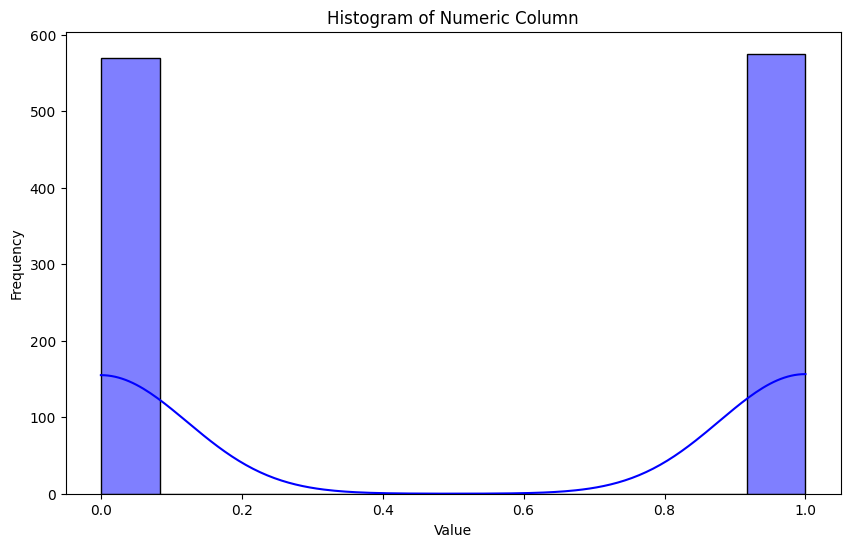

In [27]:
# Visualize the distribution of a Attorney column
plt.figure(figsize=(10, 6))
sns.histplot(df['ATTORNEY'], kde=True, color='blue')
plt.title('Histogram of Numeric Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

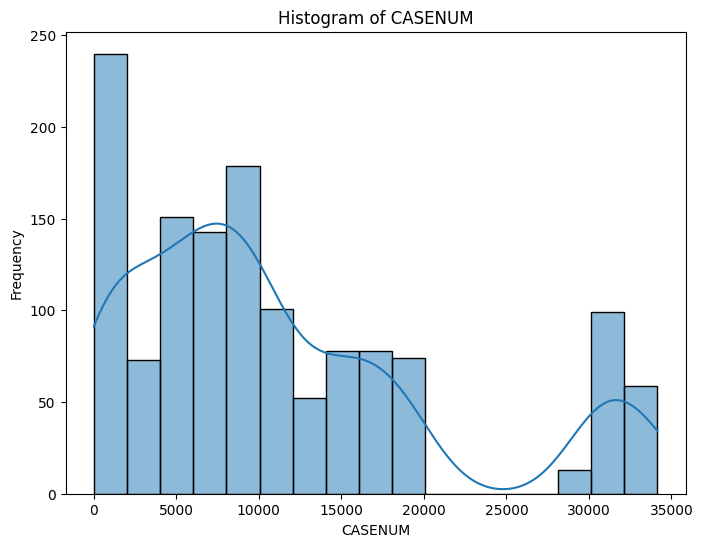

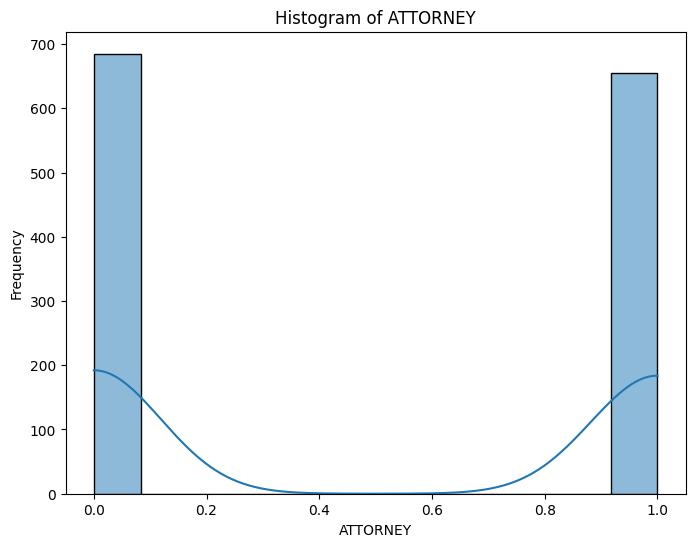

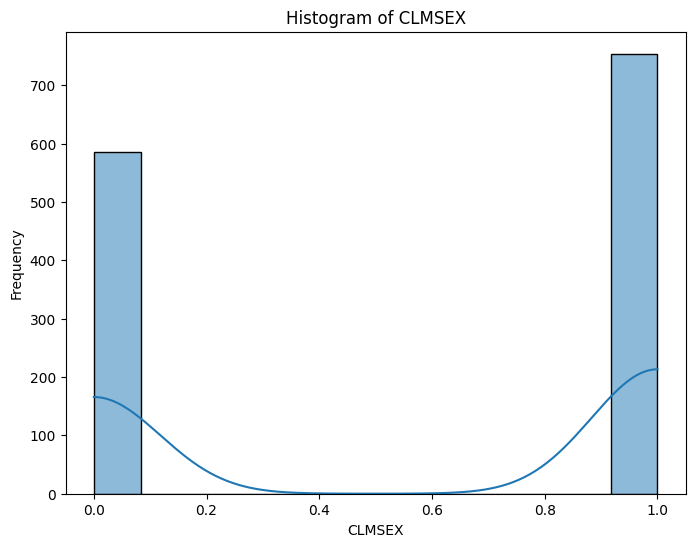

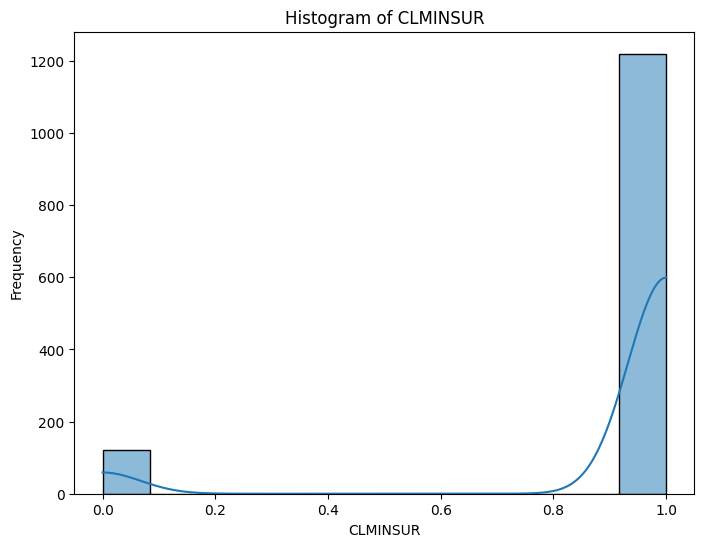

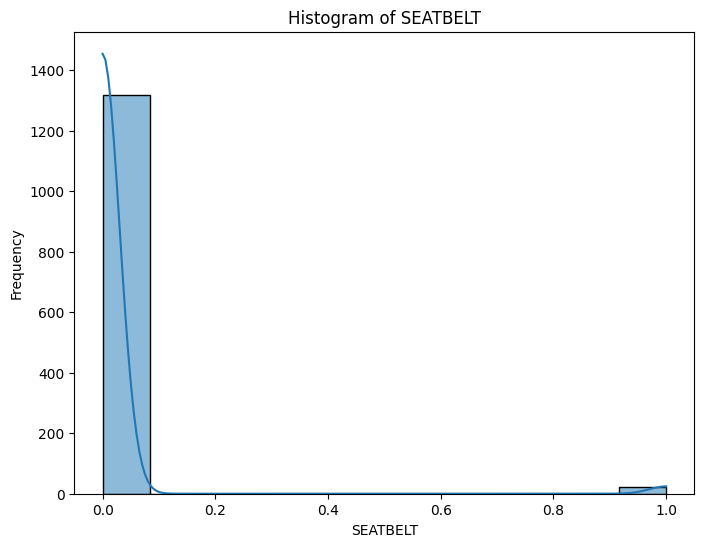

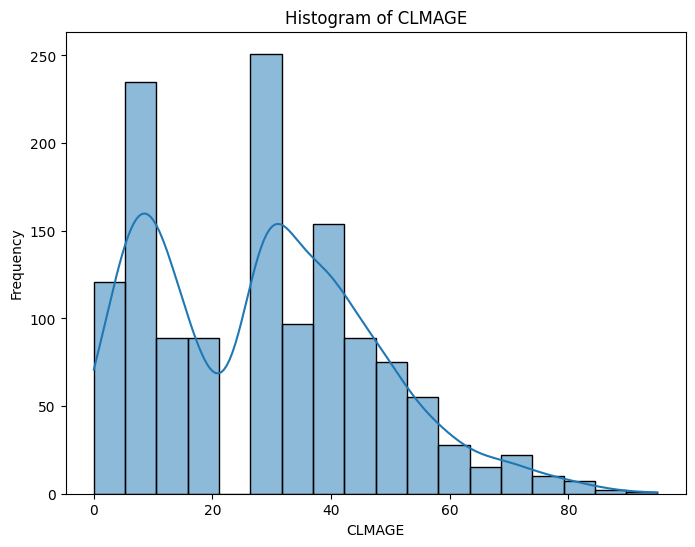

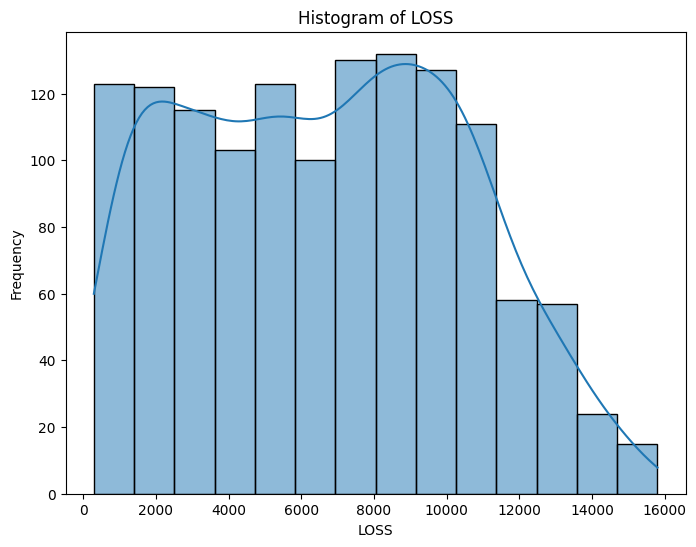

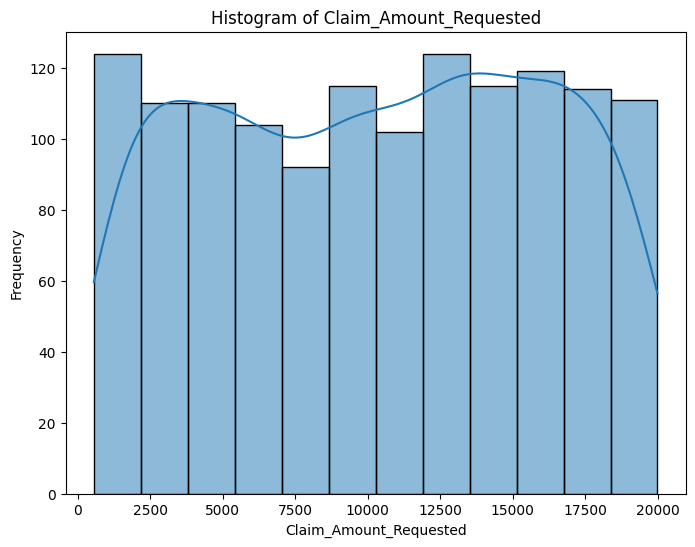

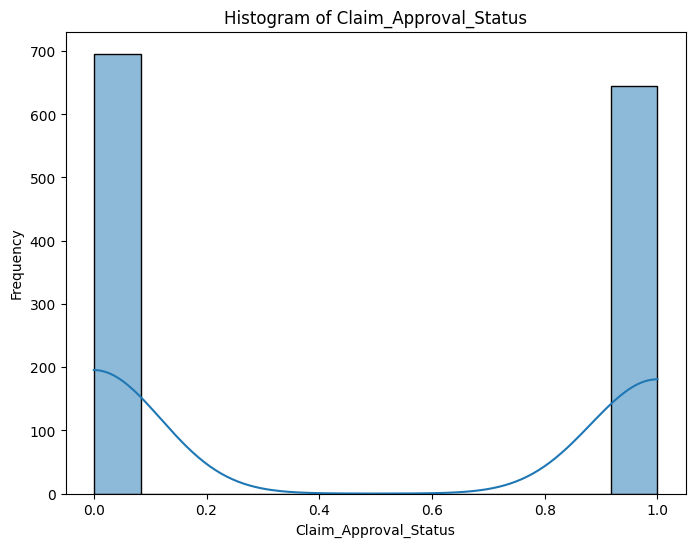

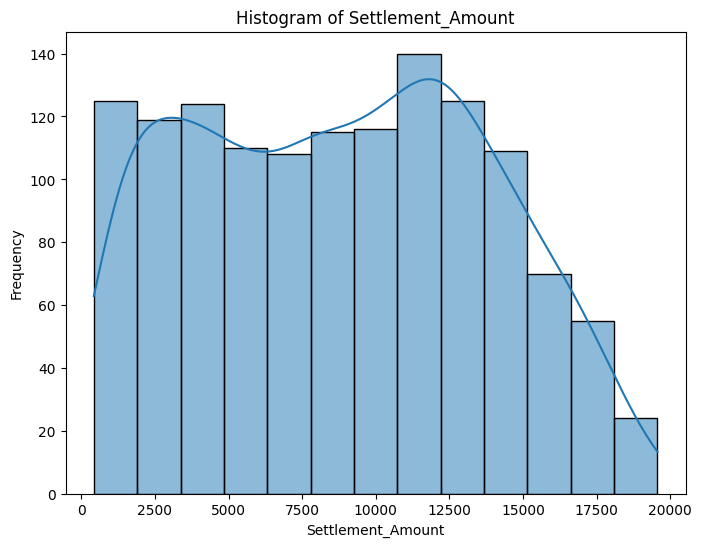

In [28]:
# Create histograms for each numeric column
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(numeric_df[column], kde=True)  # kde adds a kernel density estimate curve
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

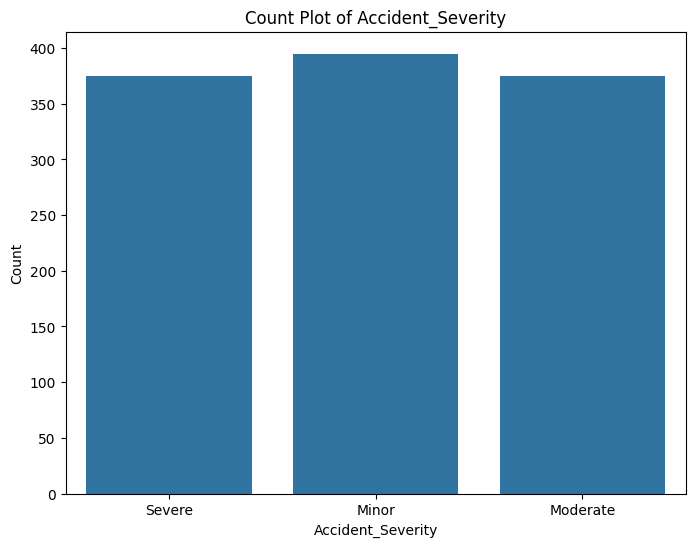

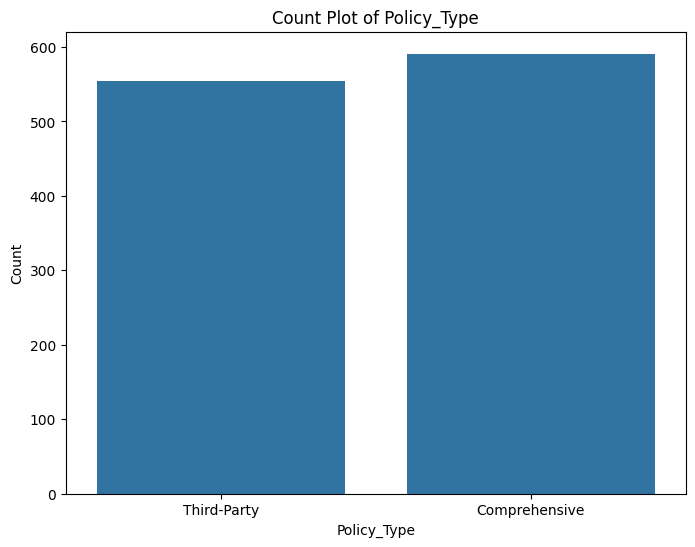

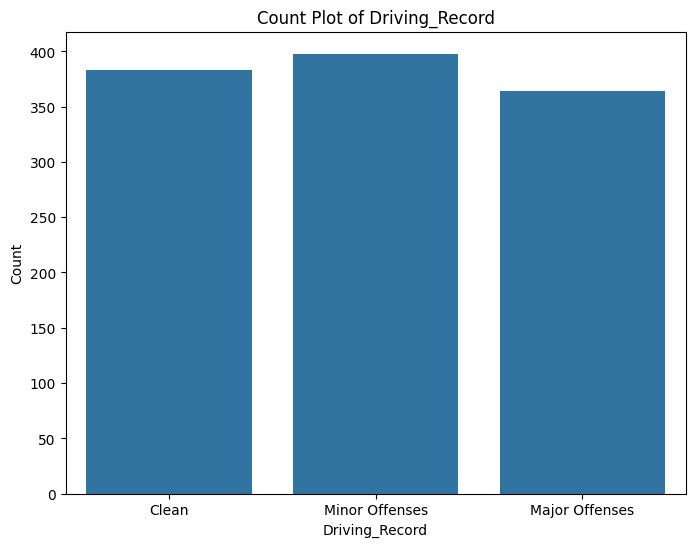

In [29]:
# Count plots
for column in categorical_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.countplot(x=df[column])  # kde adds a kernel density estimate curve
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

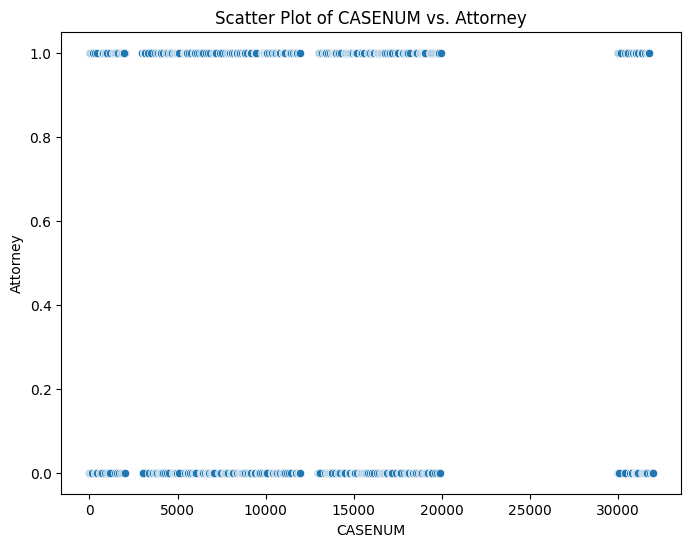

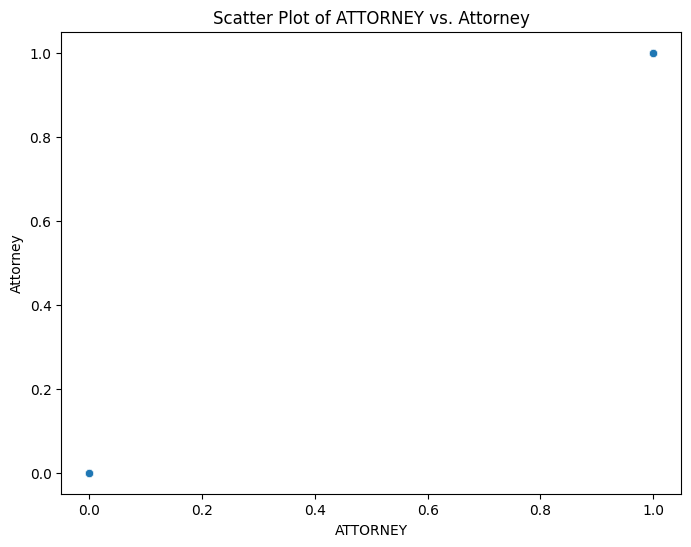

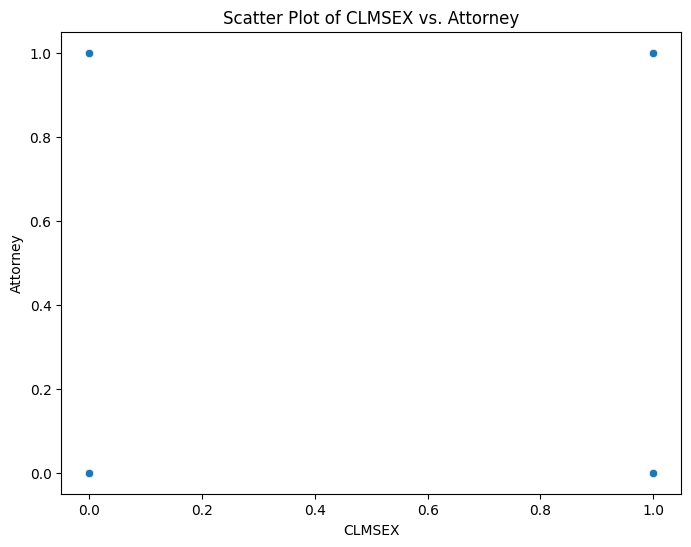

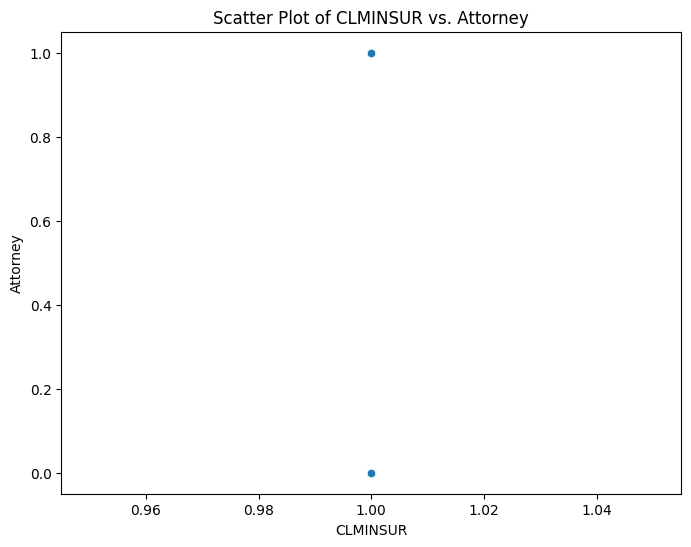

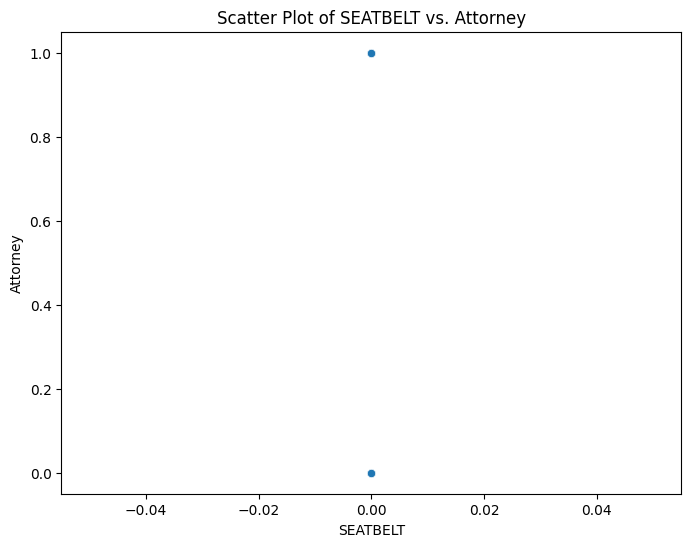

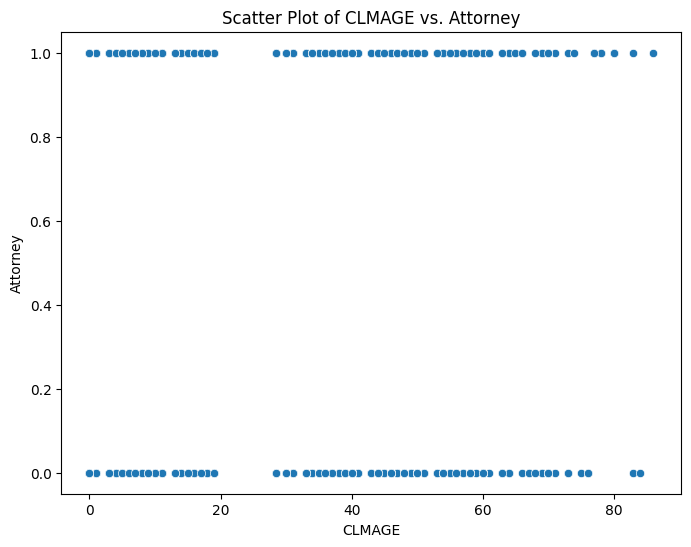

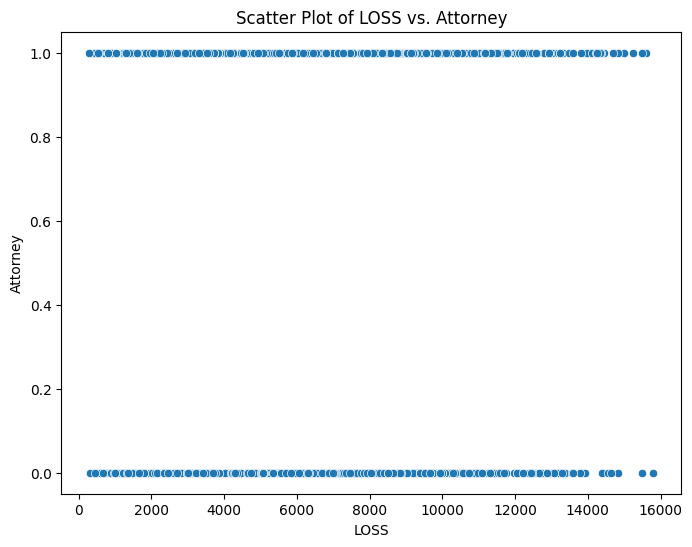

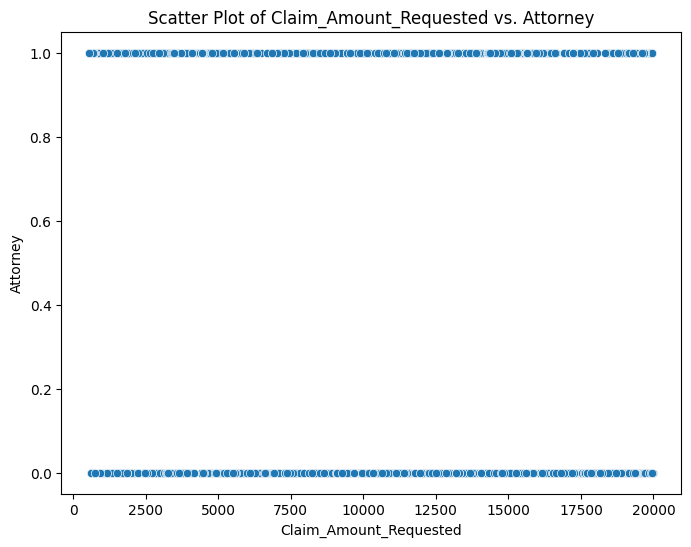

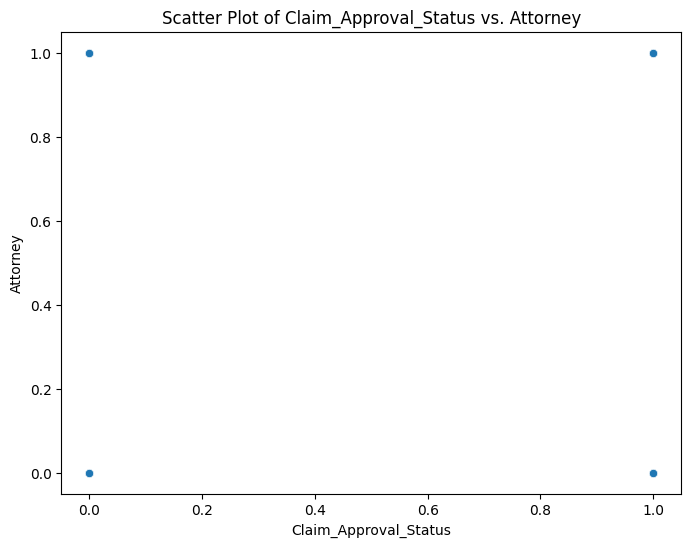

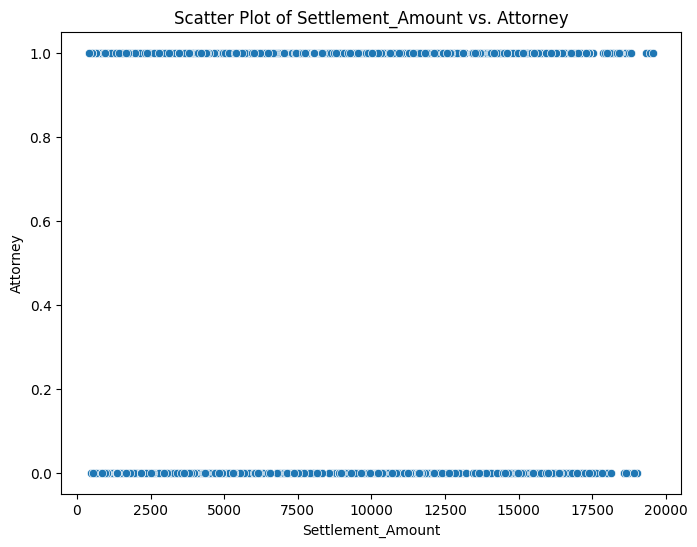

In [30]:
# Scatter plots
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    # Use sns.scatterplot() instead of sns.scatter
    sns.scatterplot(x=df[column], y=df['ATTORNEY'])
    plt.title(f'Scatter Plot of {column} vs. Attorney')
    plt.xlabel(column)
    plt.ylabel('Attorney')
    plt.show()

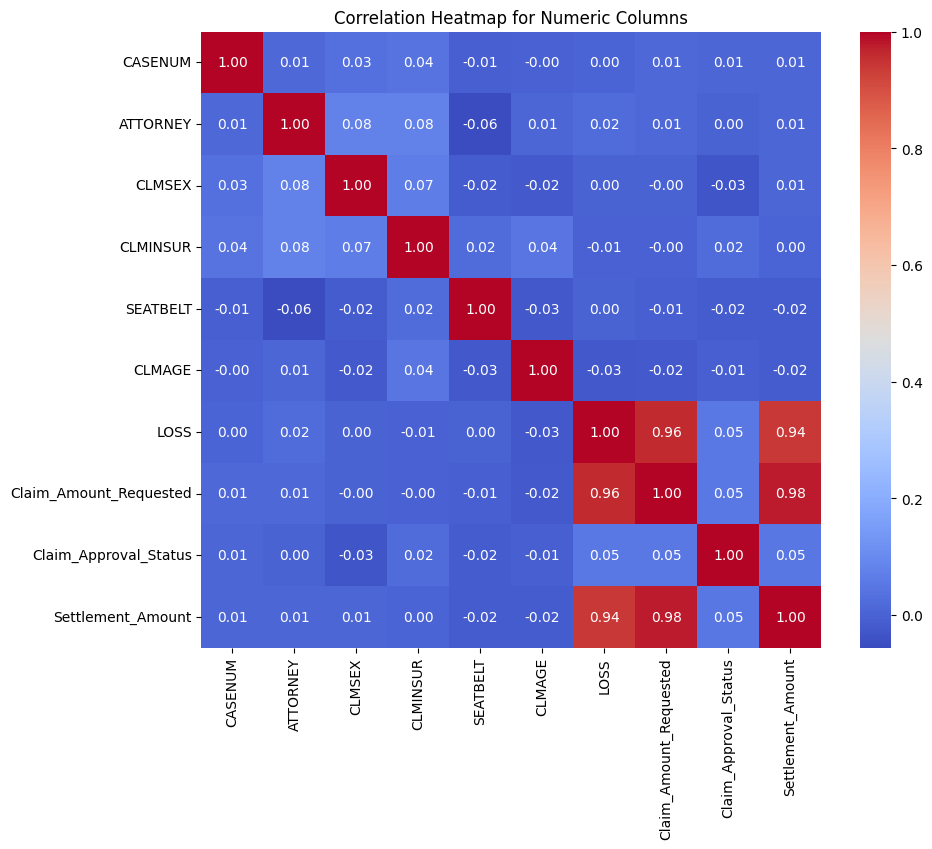

In [31]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

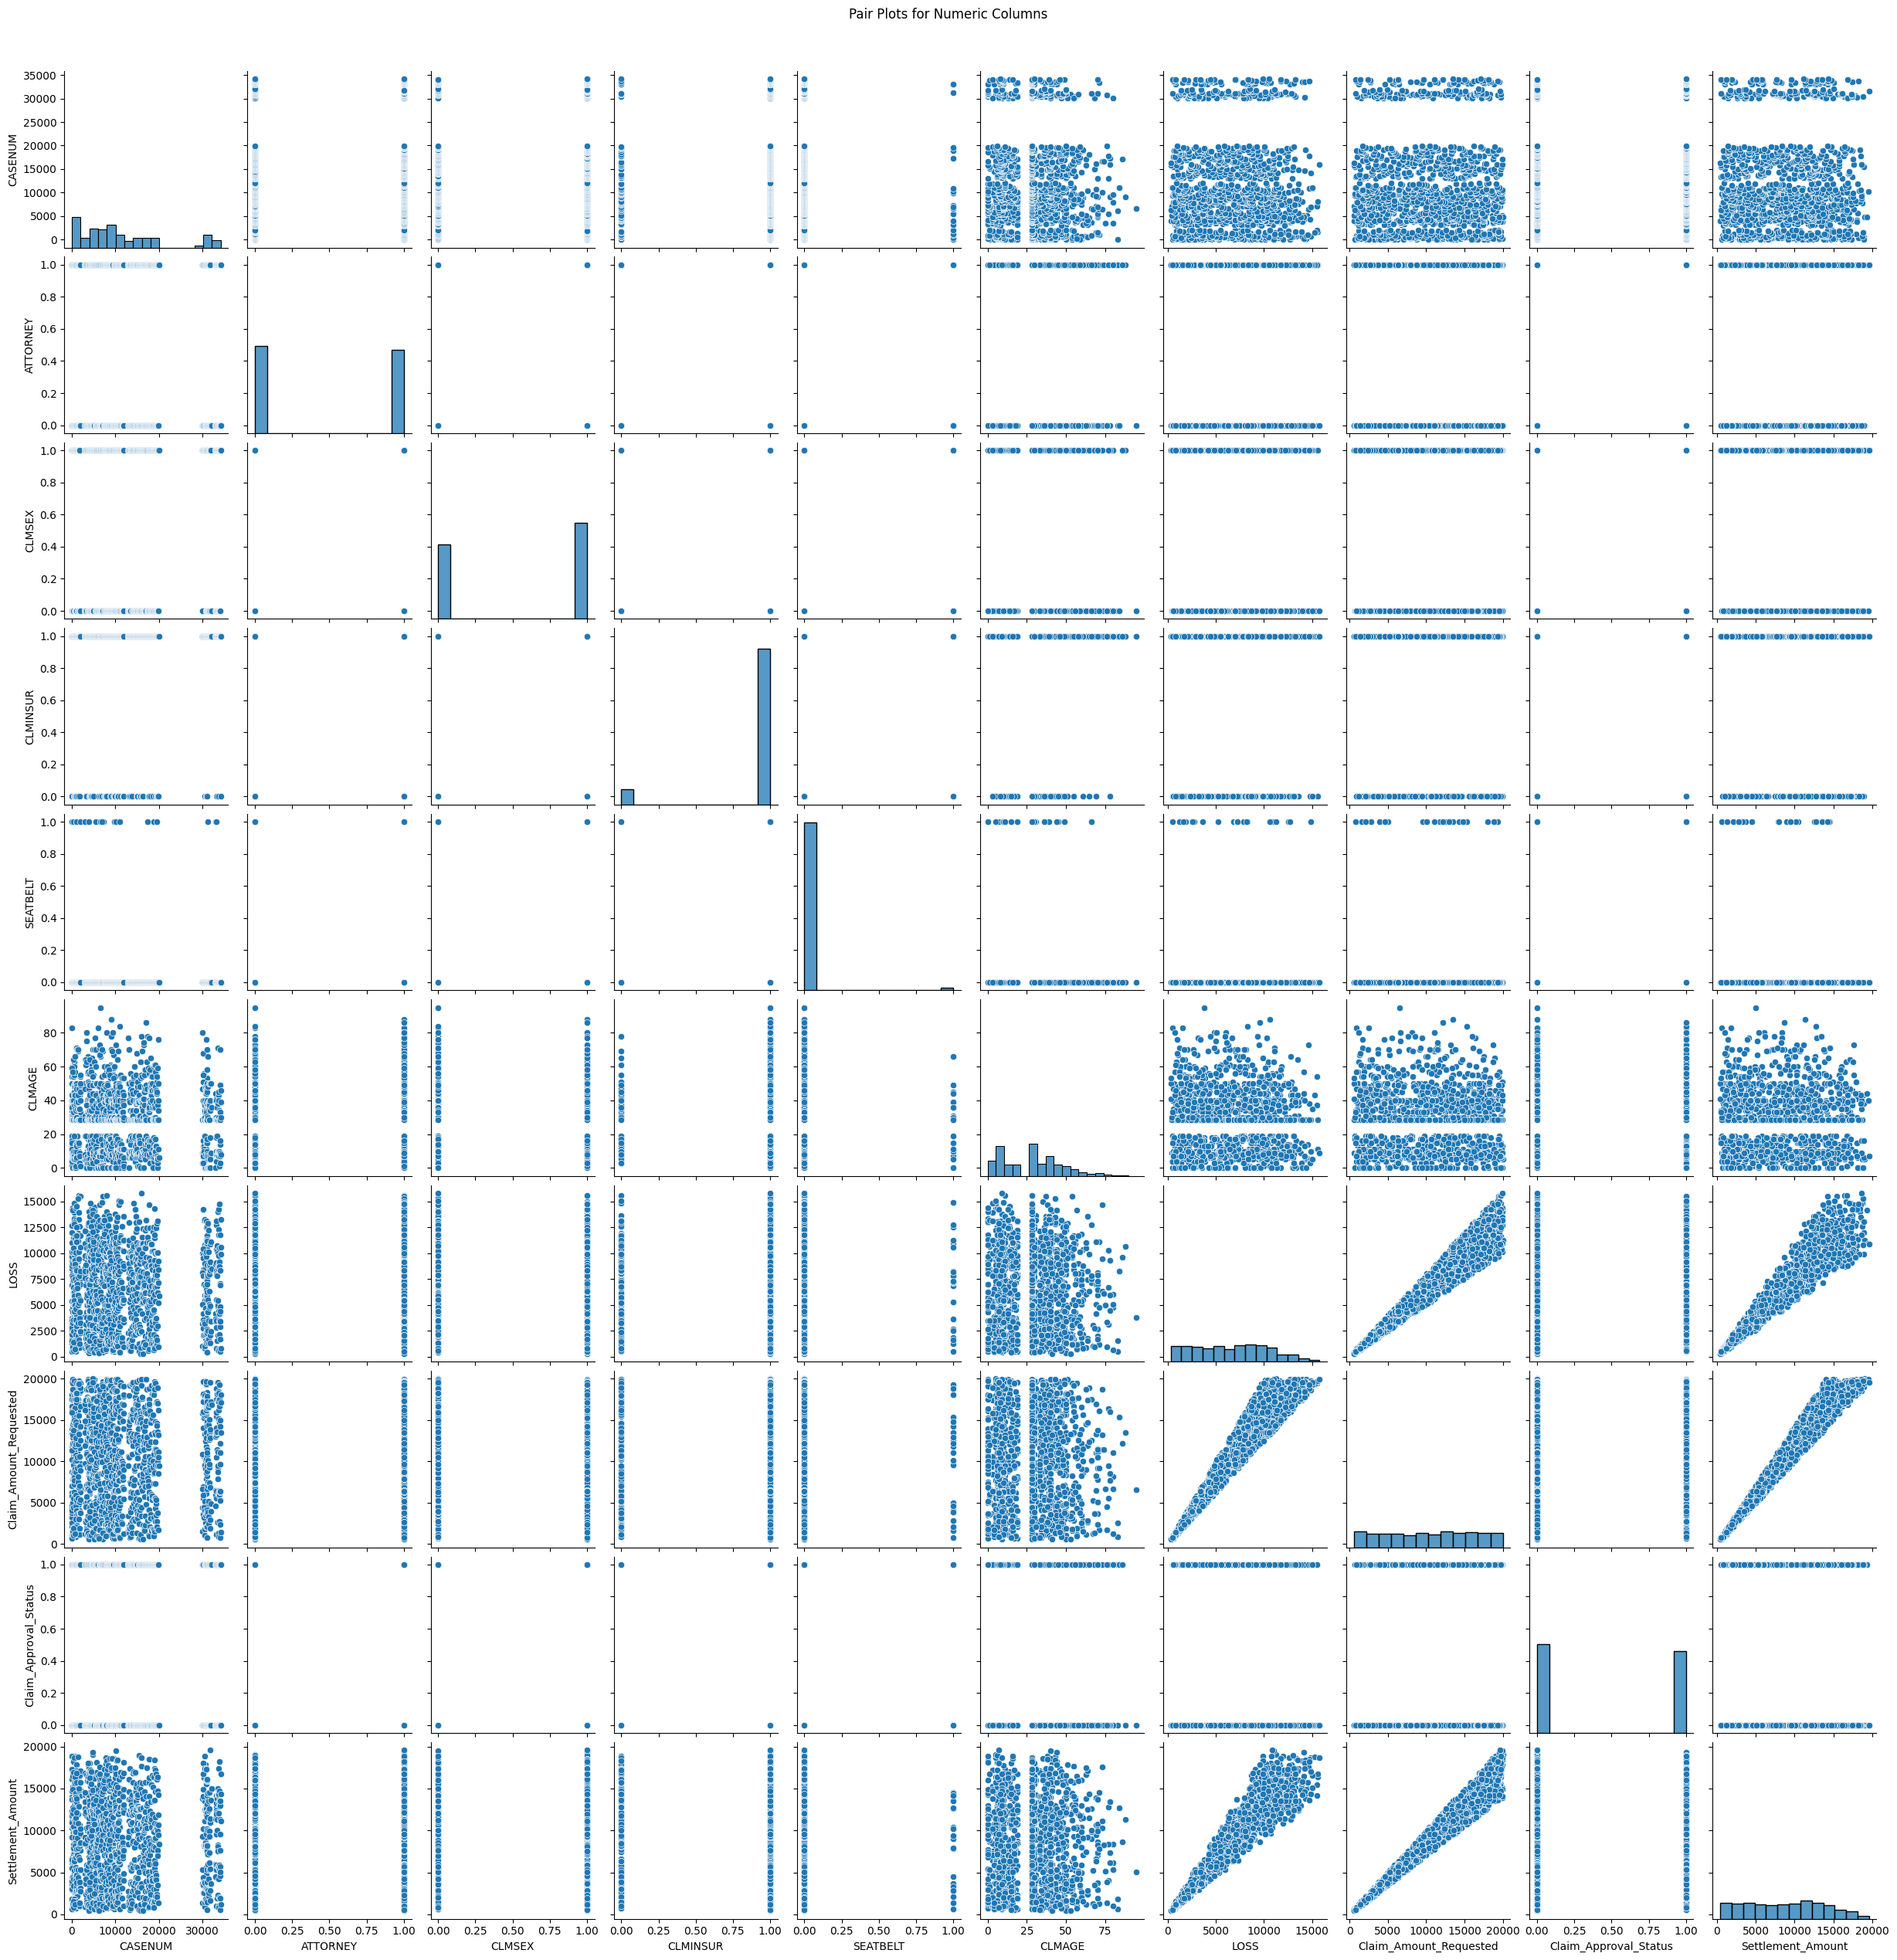

In [32]:
# Pair plots
sns.pairplot(numeric_df)
plt.suptitle('Pair Plots for Numeric Columns', y=1.02)
plt.show()

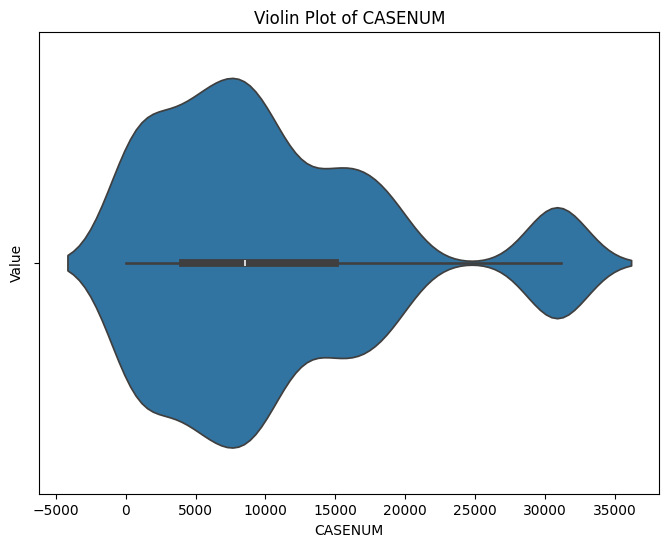

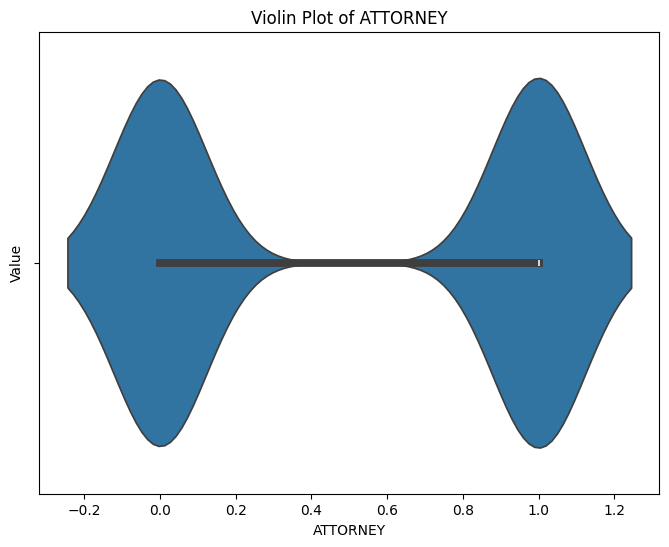

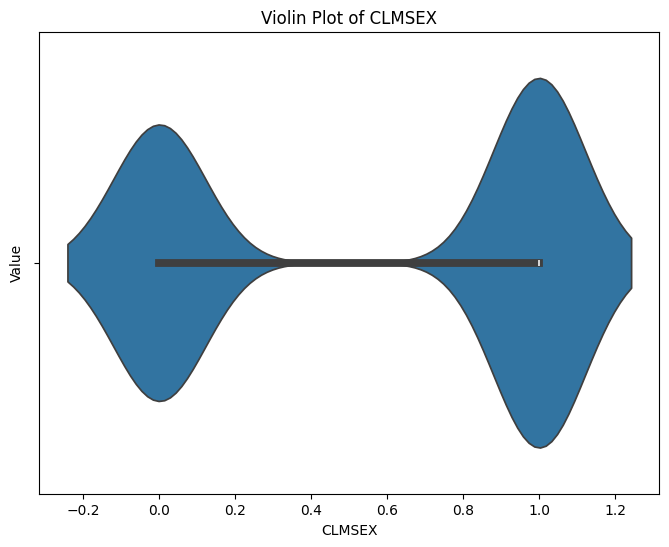

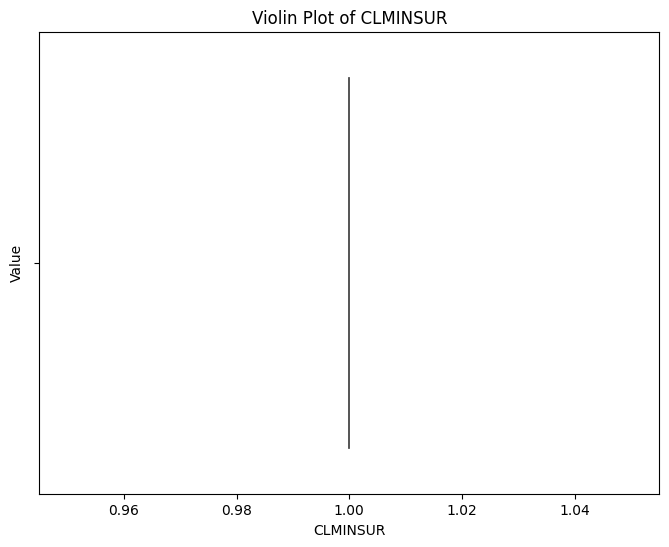

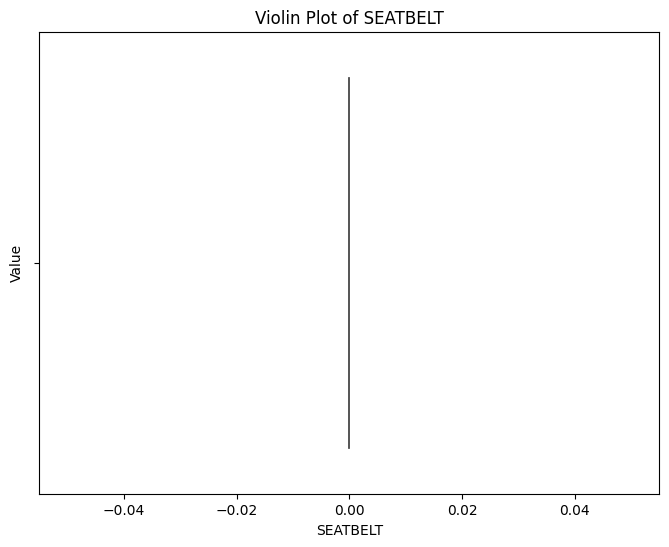

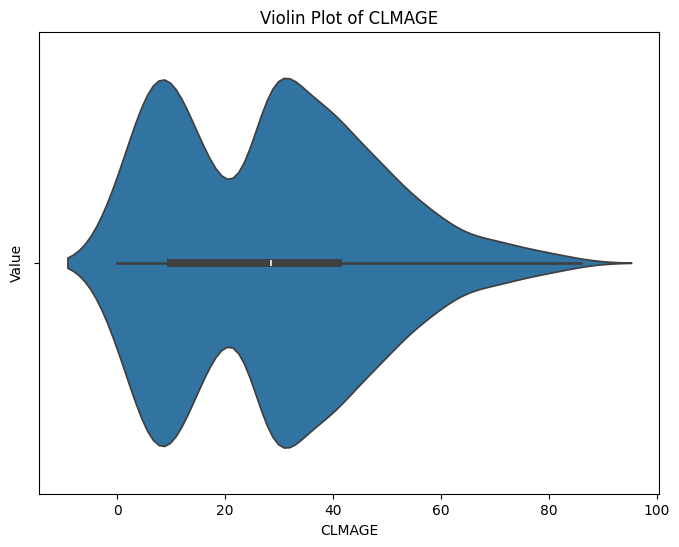

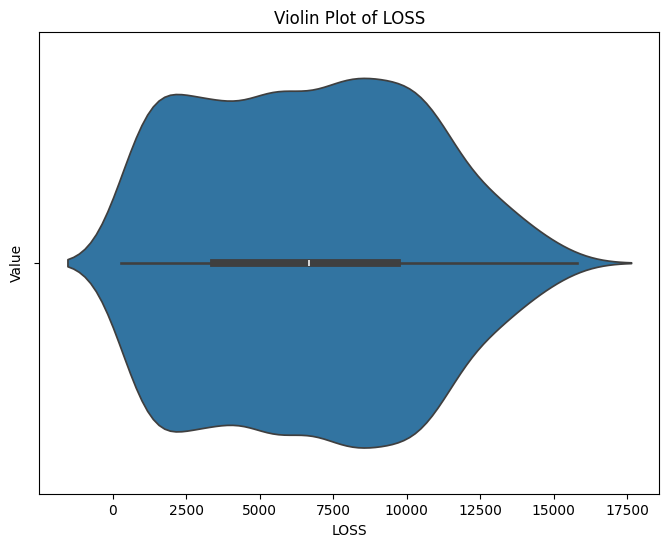

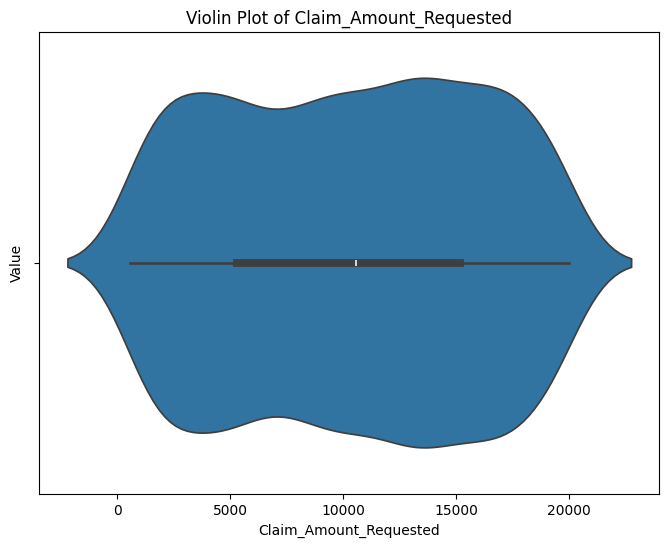

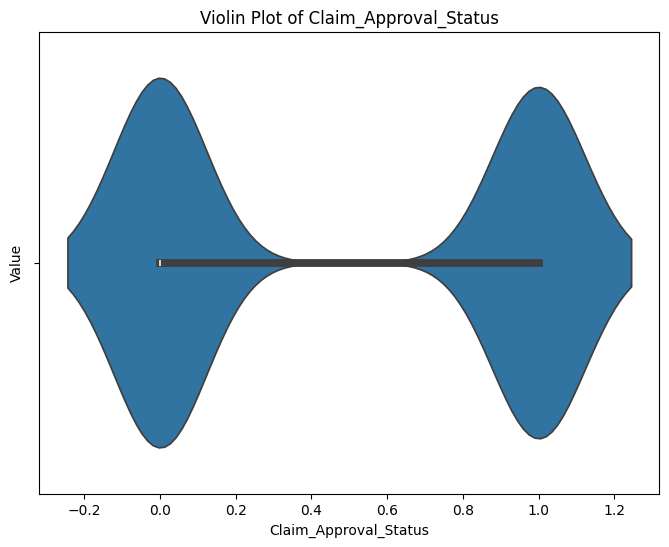

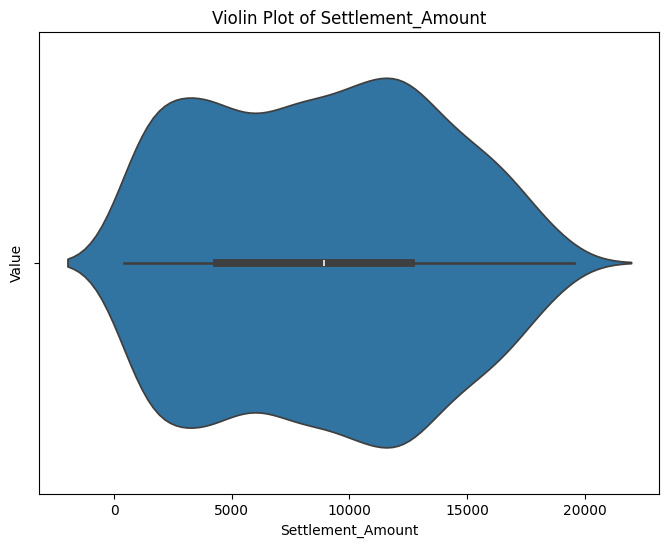

In [33]:
# Violin plots
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.violinplot(x=df[column])  # kde adds a kernel density estimate curve
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

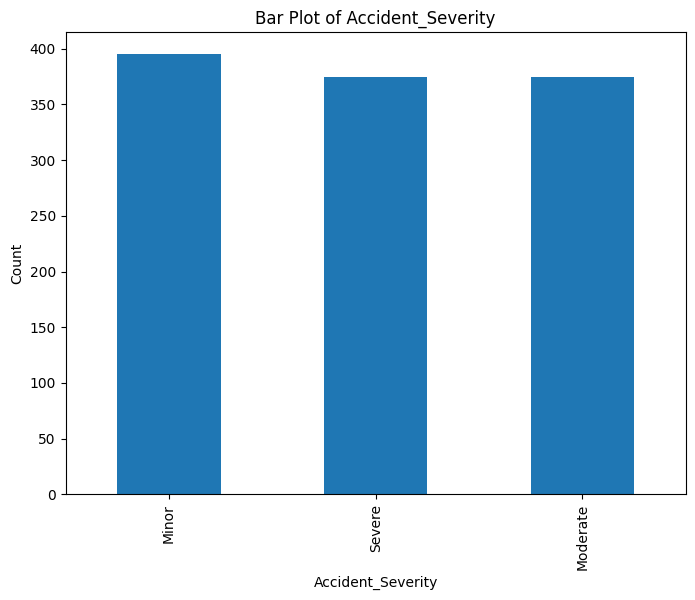

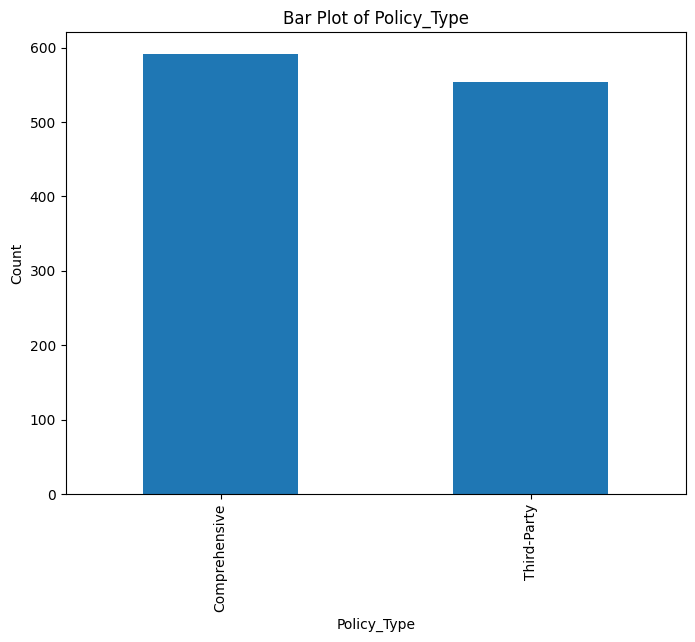

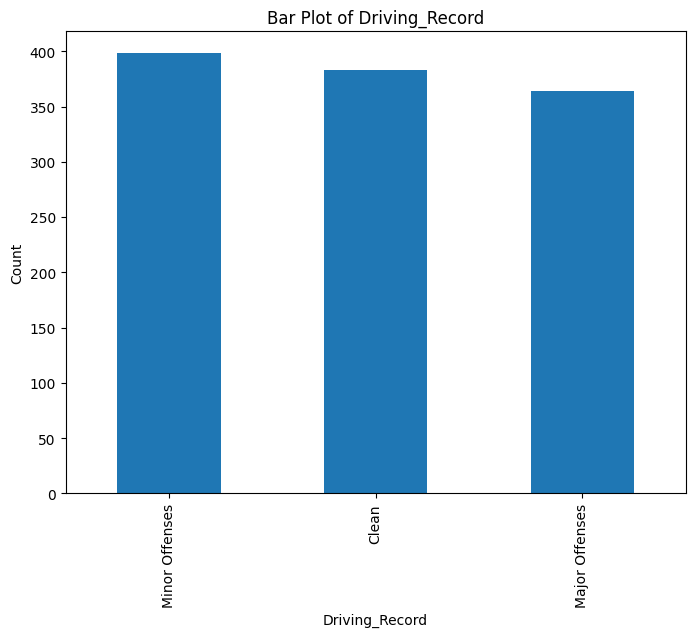

In [34]:
# Barplots
for column in categorical_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    df[column].value_counts().plot(kind='bar')  # kde adds a kernel density estimate curve
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

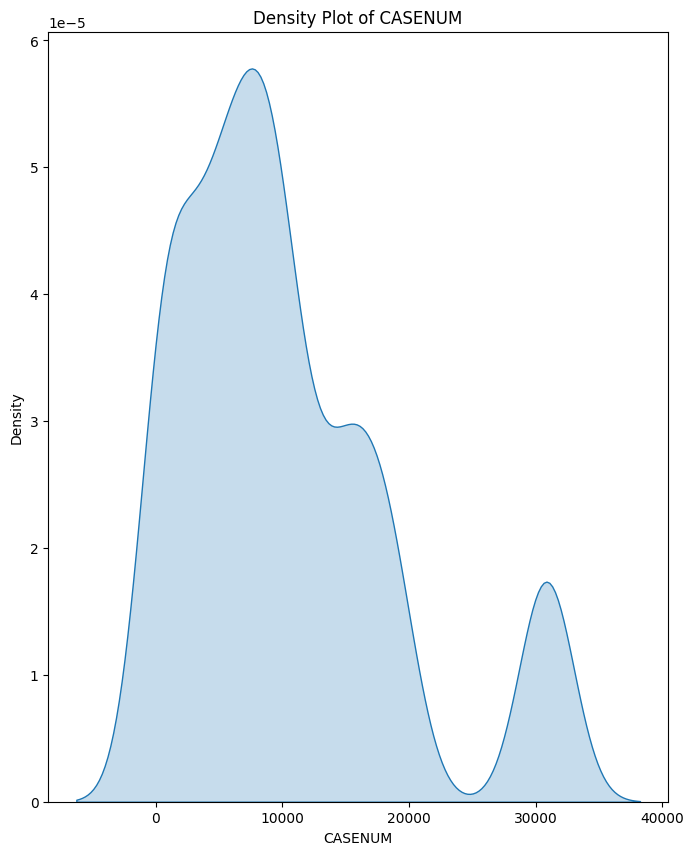

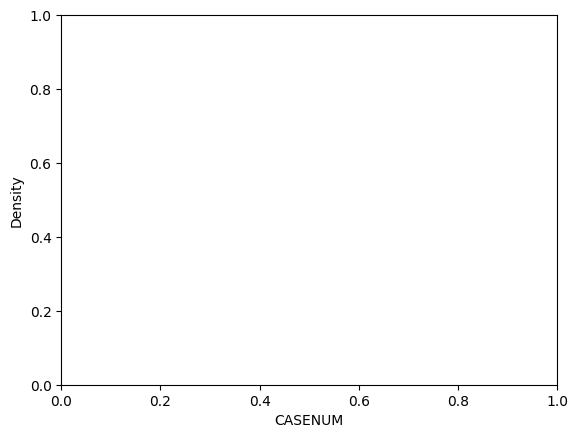

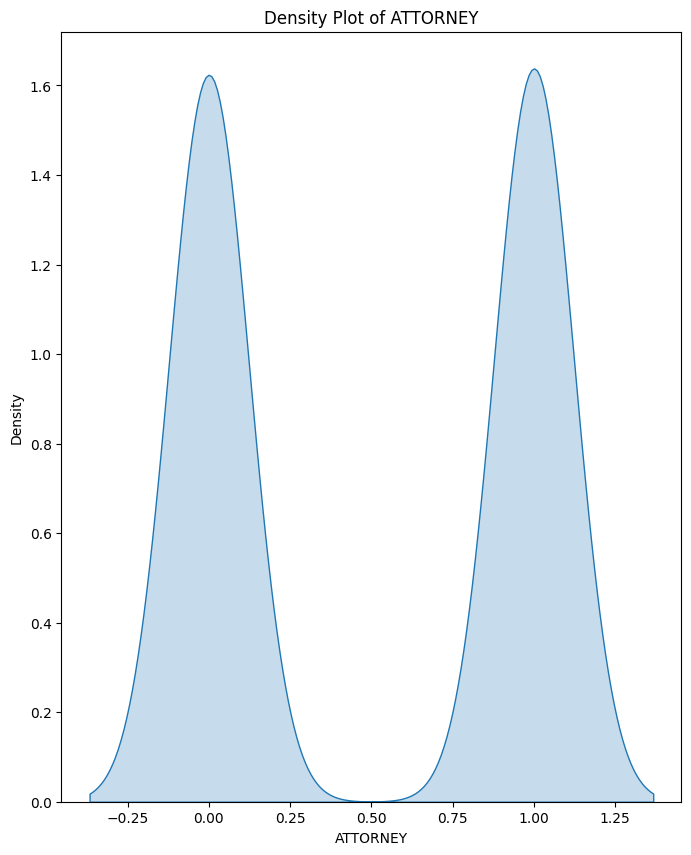

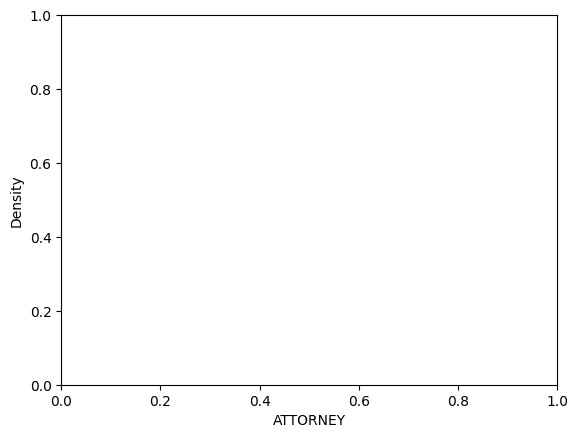

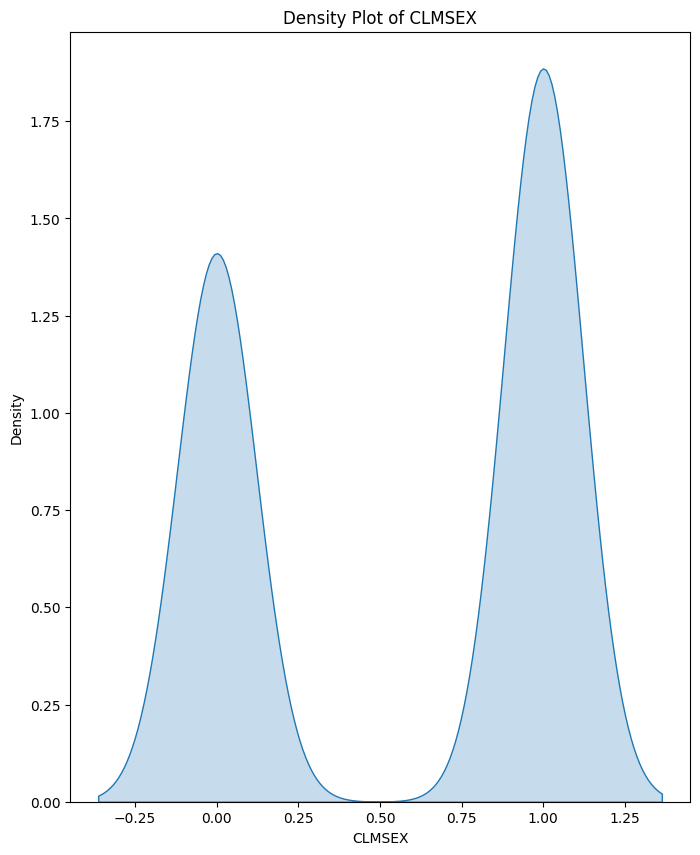

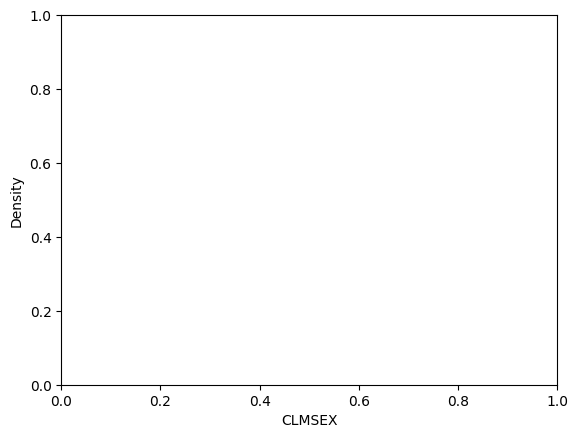

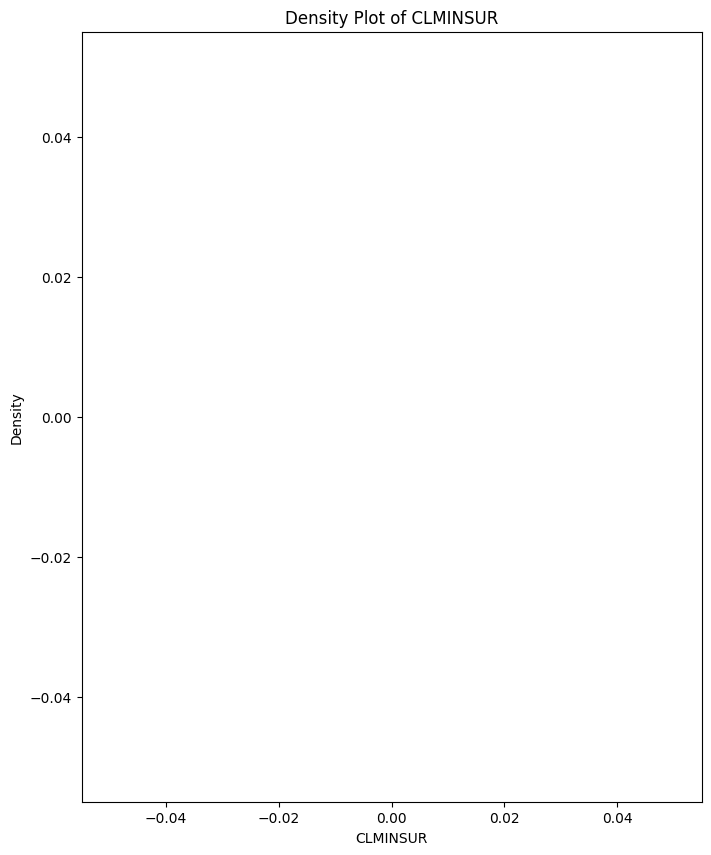

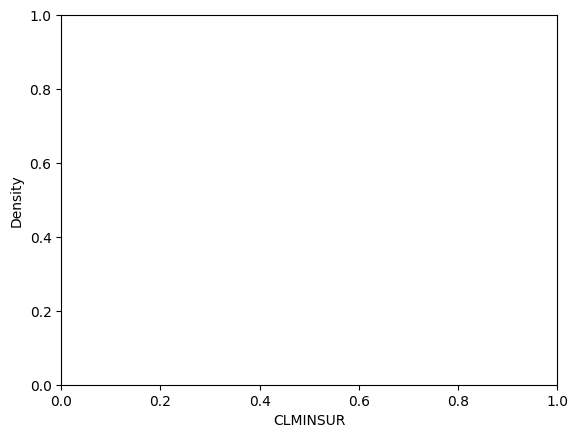

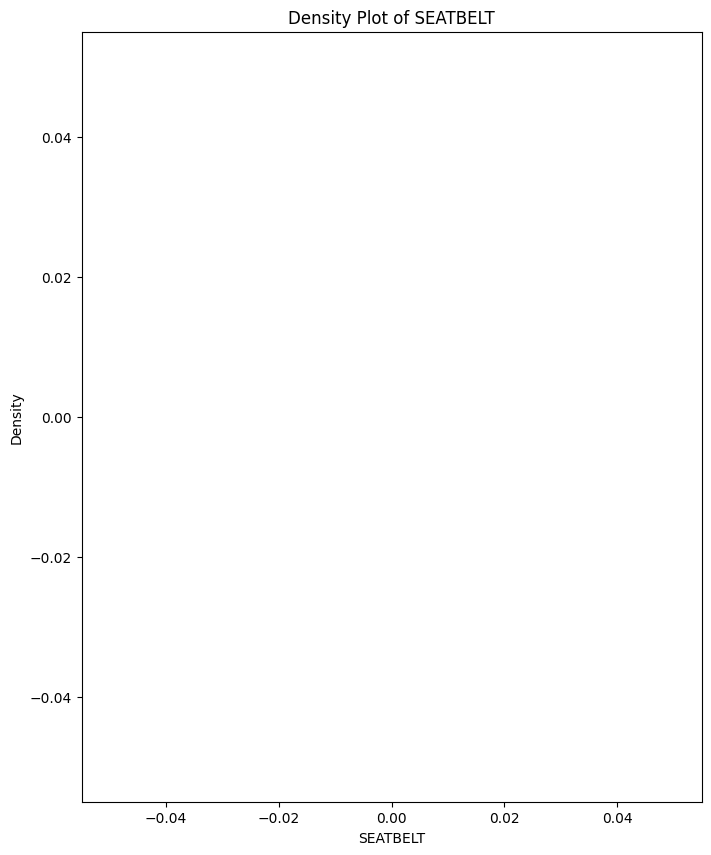

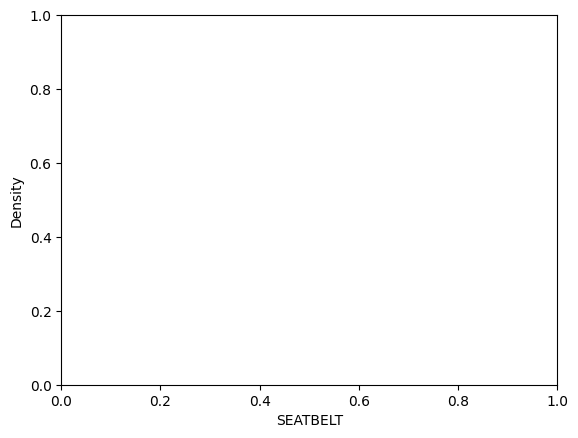

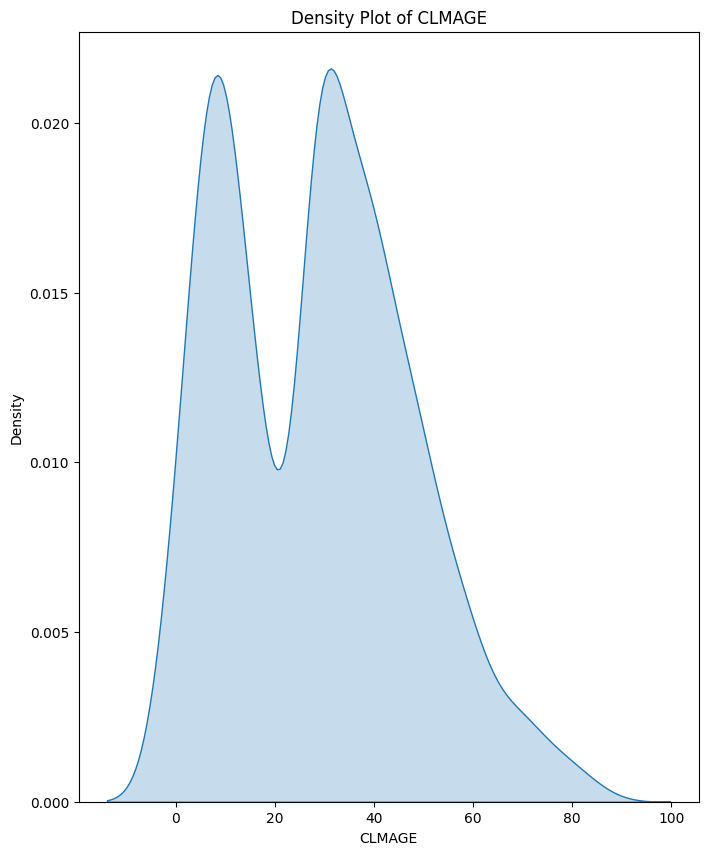

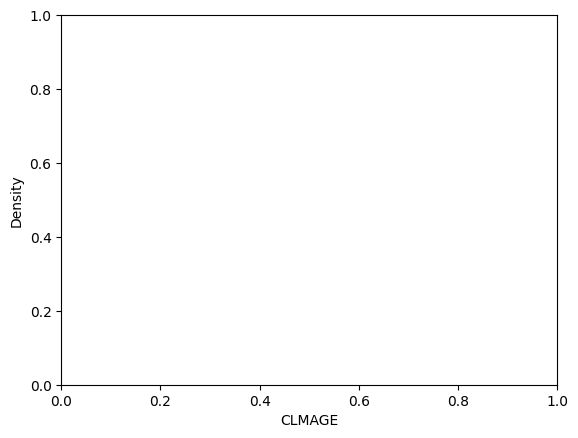

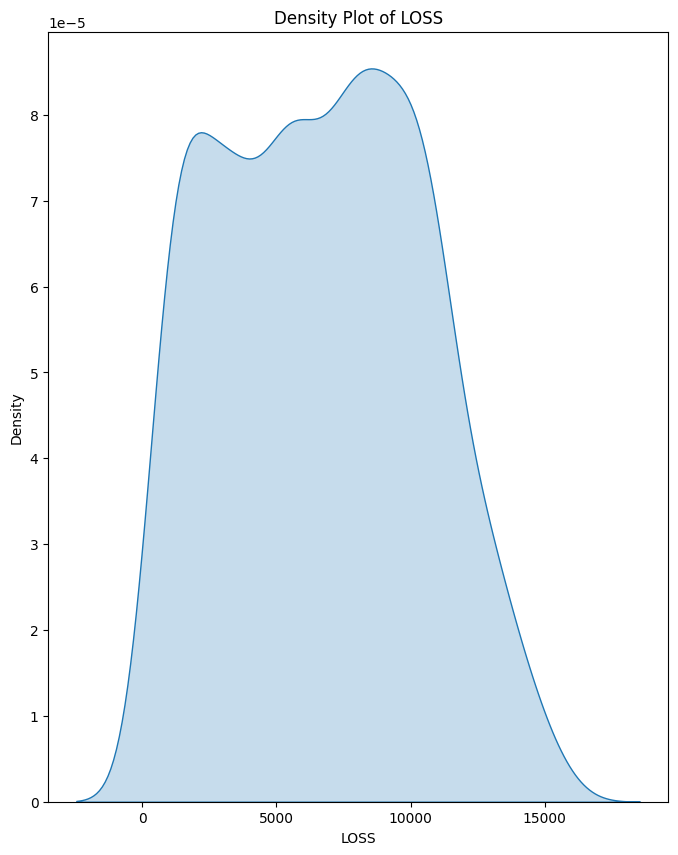

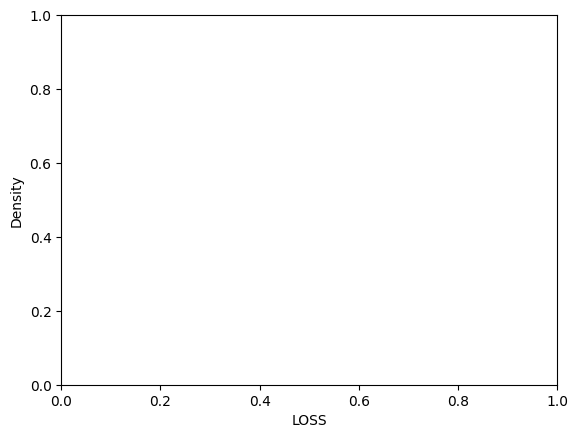

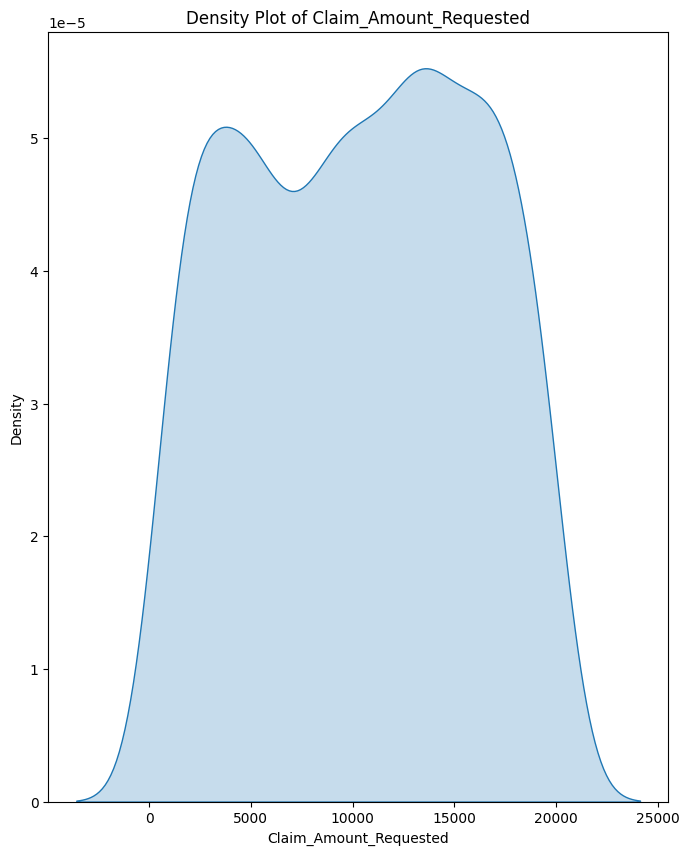

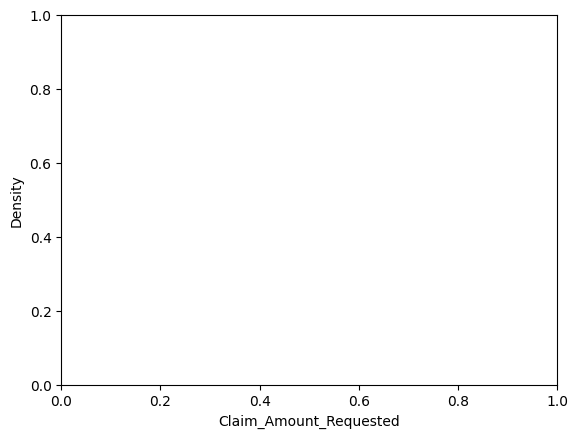

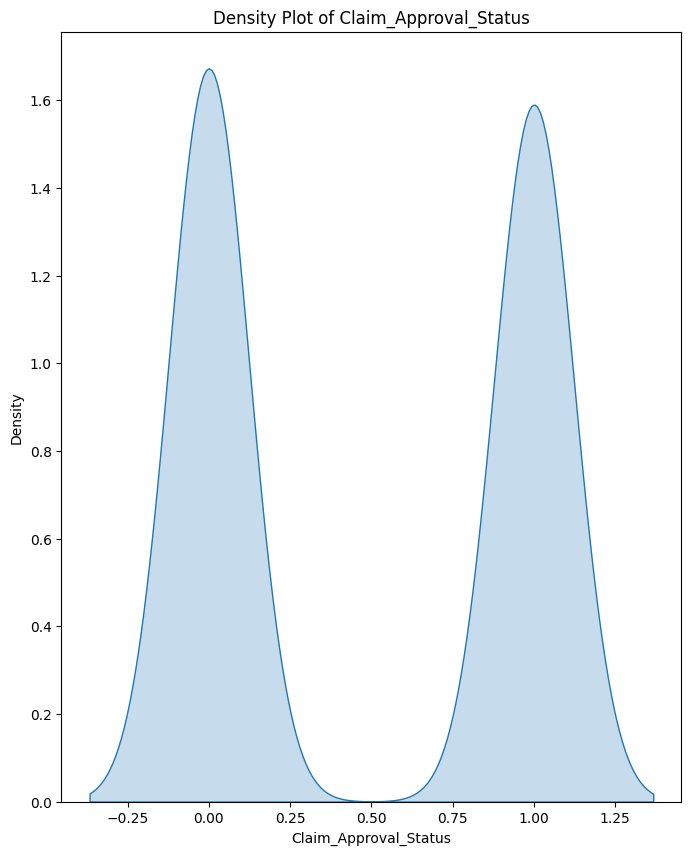

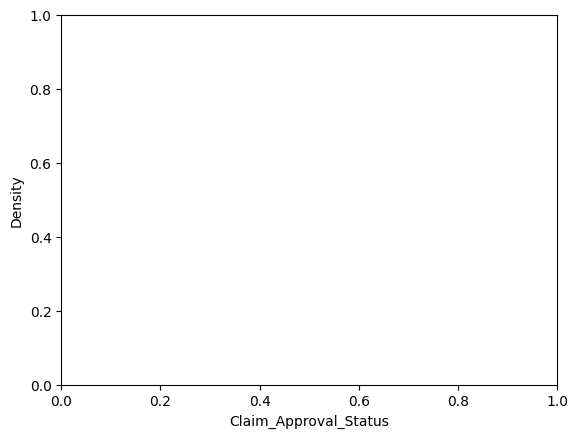

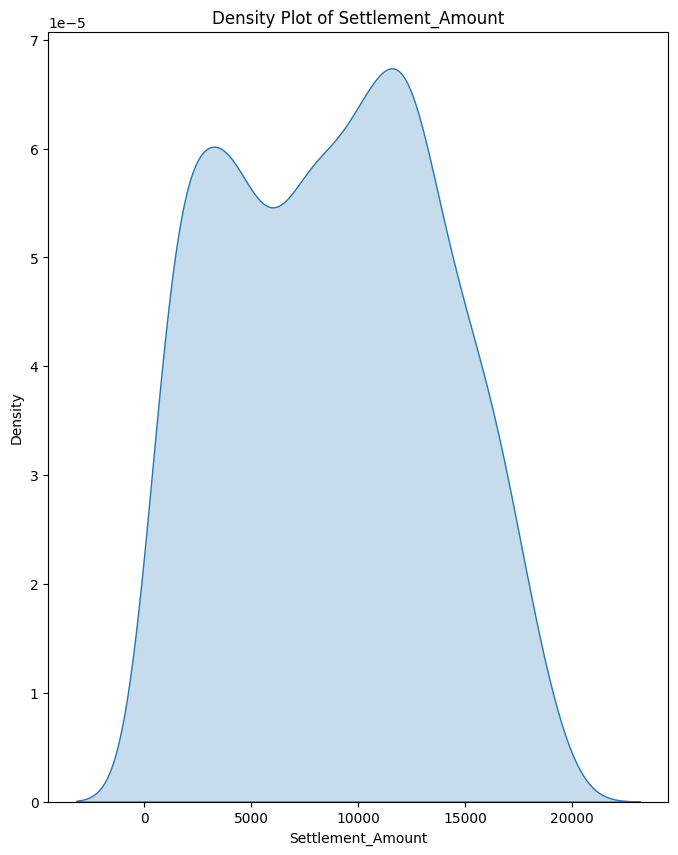

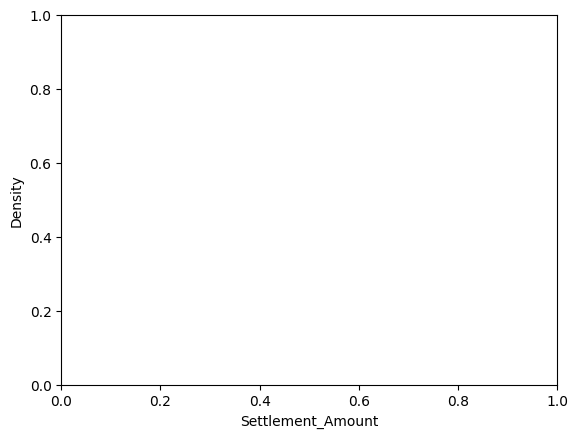

In [35]:
# Density plot
for column in numeric_df.columns:
    plt.figure(figsize=(8,10))
    sns.kdeplot(data=df, x=column, fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [36]:
df  # dataset after removing outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
5,97,0,1.0,1.0,0.0,35.0,2504.40,Minor,4553.78,0,3502.43,Third-Party,Minor Offenses
6,10,0,0.0,1.0,0.0,9.0,809.68,Severe,1017.38,0,712.62,Third-Party,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,31798,0,1.0,1.0,0.0,50.0,1355.47,Severe,1858.00,0,1675.46,Third-Party,Minor Offenses
1277,31905,0,0.0,1.0,0.0,9.0,2462.76,Severe,3910.19,1,3537.38,Comprehensive,Clean
1278,31944,0,1.0,1.0,0.0,9.0,11089.93,Severe,17186.88,1,13656.21,Third-Party,Clean
1279,31960,0,1.0,1.0,0.0,50.0,3423.54,Moderate,4930.00,0,3648.02,Third-Party,Clean


# Feature Engineering

In [37]:
# 1. Feature Creation


# Check if 'ClaimDate' column exists and convert it to datetime if necessary
if 'ClaimDate' in df.columns:
    df['ClaimDate'] = pd.to_datetime(df['ClaimDate'])

    # Extract features from the timestamp
    df['hour_of_day'] = df['ClaimDate'].dt.hour
    df['day_of_week'] = df['ClaimDate'].dt.dayofweek  # Monday=0, Sunday=6
    df['day_of_month'] = df['ClaimDate'].dt.day
    df['month'] = df['ClaimDate'].dt.month
    df['year'] = df['ClaimDate'].dt.year
    df['week_of_year'] = df['ClaimDate'].dt.isocalendar().week
    df['quarter'] = df['ClaimDate'].dt.quarter

    #  Create a binary feature for weekend
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

else:
    print("No 'ClaimDate' column found in the DataFrame.")



# Check if 'ClaimAmount' and 'VehicleAge' columns are present
if 'ClaimAmount' in df.columns and 'VehicleAge' in df.columns:
    df['AmountVehicleAgeRatio'] = df['ClaimAmount'] / df['VehicleAge']
else:
    print("Either 'ClaimAmount' or 'VehicleAge' column is missing. Skipping 'AmountVehicleAgeRatio' creation.")


#  Create interaction term of 'CLMAGE' and 'CLMSEX'
if 'CLMAGE' in df.columns and 'CLMSEX' in df.columns:
    df['AgeSexInteraction'] = df['CLMAGE'] * df['CLMSEX']
else:
    print("Either 'CLMAGE' or 'CLMSEX' column is missing. Skipping 'AgeSexInteraction' creation.")

df.head()

No 'ClaimDate' column found in the DataFrame.
Either 'ClaimAmount' or 'VehicleAge' column is missing. Skipping 'AmountVehicleAgeRatio' creation.


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record,AgeSexInteraction
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean,0.0
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses,0.0
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean,0.0
5,97,0,1.0,1.0,0.0,35.0,2504.40,Minor,4553.78,0,3502.43,Third-Party,Minor Offenses,35.0
6,10,0,0.0,1.0,0.0,9.0,809.68,Severe,1017.38,0,712.62,Third-Party,Clean,0.0


In [38]:
#separte the target column:
target=df[['ATTORNEY']]
target

,ATTORNEY
0,0
2,1
4,1
5,0
6,0
...,...
1276,0
1277,0
1278,0
1279,0


In [39]:
df.drop(columns=['ATTORNEY','CASENUM','AgeSexInteraction'],inplace=True)

In [40]:
df.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
2,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
4,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
5,1.0,1.0,0.0,35.0,2504.40,Minor,4553.78,0,3502.43,Third-Party,Minor Offenses
6,0.0,1.0,0.0,9.0,809.68,Severe,1017.38,0,712.62,Third-Party,Clean


In [41]:
# Dummy variables for the 'Policy_Type' column as it is Nominal
policy_dummies = pd.get_dummies(df['Policy_Type'], prefix='Policy', dtype=int)

# Concatenating dummies with the original DataFrame
df = pd.concat([df.drop('Policy_Type', axis=1), policy_dummies], axis=1)


# Display the updated DataFrame
df.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Driving_Record,Policy_Comprehensive,Policy_Third-Party
0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Clean,0,1
2,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Minor Offenses,1,0
4,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Clean,1,0
5,1.0,1.0,0.0,35.0,2504.40,Minor,4553.78,0,3502.43,Minor Offenses,0,1
6,0.0,1.0,0.0,9.0,809.68,Severe,1017.38,0,712.62,Clean,0,1


In [42]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

#Accident Severity (Minor=0 < Moderate=1 < Severe=2)
df['Accident_Severity'] = label_encoder.fit_transform(df['Accident_Severity'])

# Custom mapping for 'Driving_Record'
driving_record_mapping = {'Clean': 0, 'Minor Offenses': 1, 'Major Offenses': 2}
# Apply the mapping
df['Driving_Record'] = df['Driving_Record'].map(driving_record_mapping)

df.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Driving_Record,Policy_Comprehensive,Policy_Third-Party
0,0.0,1.0,0.0,50.0,2367.86,2,4497.19,1,3221.74,0,0,1
2,0.0,1.0,0.0,5.0,14282.43,2,17978.55,0,13804.61,1,1,0
4,0.0,1.0,0.0,30.0,1354.31,0,2167.42,0,1714.83,0,1,0
5,1.0,1.0,0.0,35.0,2504.40,0,4553.78,0,3502.43,1,0,1
6,0.0,1.0,0.0,9.0,809.68,2,1017.38,0,712.62,0,0,1


In [43]:
# Identify numerical columns to standardize
columns_to_standardize = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

# Standardize the selected columns
scaler = StandardScaler()
# Fit and transform on df1, which has the reduced number of rows after outlier removal
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df


,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Driving_Record,Policy_Comprehensive,Policy_Third-Party
0,0.0,1.0,0.0,1.119453,-1.146036,2,-1.033131,1,-1.131874,0,0,1
2,0.0,1.0,0.0,-1.260057,2.031198,2,1.354795,0,1.018171,1,1,0
4,0.0,1.0,0.0,0.061893,-1.416317,0,-1.445799,0,-1.438022,0,1,0
5,1.0,1.0,0.0,0.326283,-1.109625,0,-1.023108,0,-1.074848,1,0,1
6,0.0,1.0,0.0,-1.048545,-1.561552,2,-1.649503,0,-1.641634,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1.0,1.0,0.0,1.119453,-1.416008,2,-1.500606,0,-1.446021,1,0,1
1277,0.0,1.0,0.0,-1.048545,-1.120729,2,-1.137105,1,-1.067748,0,1,0
1278,1.0,1.0,0.0,-1.048545,1.179860,2,1.214568,1,0.988021,0,0,1
1279,1.0,1.0,0.0,1.119453,-0.864520,1,-0.956469,0,-1.045270,0,0,1


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data

,feature,VIF
0,CLMSEX,1.003202
1,CLMINSUR,0.000000
2,SEATBELT,NaN
3,CLMAGE,1.003005
4,LOSS,13.042605
5,Accident_Severity,1.006298
6,Claim_Amount_Requested,35.560347
7,Claim_Approval_Status,1.011716
8,Settlement_Amount,23.773687
9,Driving_Record,1.007149


In [45]:
# Creating a new feature by summing 'Claim_Amount_Requested' and 'Settlement_Amount'
df['Claim_Settlement_Total'] = df['Claim_Amount_Requested'] / df['Settlement_Amount']

# Drop the original columns to avoid redundancy
df = df.drop(columns=['Claim_Amount_Requested', 'Settlement_Amount'])

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data

,feature,VIF
0,CLMSEX,1.003000
1,CLMINSUR,0.000000
2,SEATBELT,NaN
3,CLMAGE,1.003291
4,LOSS,1.007896
5,Accident_Severity,1.006009
6,Claim_Approval_Status,1.011984
7,Driving_Record,1.009460
8,Policy_Comprehensive,inf
9,Policy_Third-Party,inf


In [47]:
df.drop(columns=['SEATBELT','Policy_Comprehensive','Policy_Third-Party'],inplace=True)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data

,feature,VIF
0,CLMSEX,1.002886
1,CLMINSUR,6.137712
2,CLMAGE,1.002973
3,LOSS,1.007053
4,Accident_Severity,1.005967
5,Claim_Approval_Status,1.011875
6,Driving_Record,1.006469
7,Claim_Settlement_Total,1.005641


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(858, 8)
(858, 1)
(287, 8)
(287, 1)


In [50]:
# prompt: print x_train columns

x_train.columns


Index(['CLMSEX', 'CLMINSUR', 'CLMAGE', 'LOSS', 'Accident_Severity',
       'Claim_Approval_Status', 'Driving_Record', 'Claim_Settlement_Total'],
      dtype='object')

# Data modeling

Accuracy: 0.5331010452961672
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56       136
           1       0.57      0.46      0.51       151

    accuracy                           0.53       287
   macro avg       0.54      0.54      0.53       287
weighted avg       0.54      0.53      0.53       287

Confusion Matrix:
[[84 52]
 [82 69]]


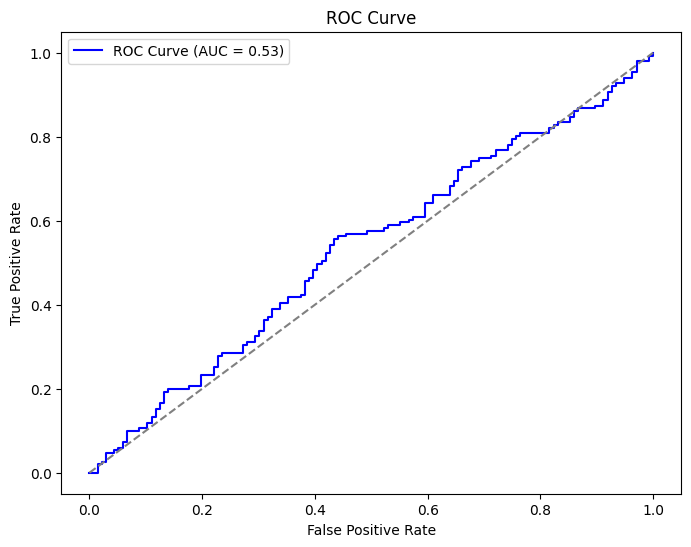

In [51]:
#1  logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predictions
y_pred = log_reg.predict(x_test)

#Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [52]:
#2. Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)

# Predictions
y_pred = rf_clf.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5296167247386759
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       136
           1       0.56      0.50      0.53       151

    accuracy                           0.53       287
   macro avg       0.53      0.53      0.53       287
weighted avg       0.53      0.53      0.53       287



In [53]:
#3. SVM ( Support Vector MAchine )
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(x_train, y_train)

# Predictions
y_pred = svm_clf.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5087108013937283
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.71      0.58       136
           1       0.56      0.33      0.41       151

    accuracy                           0.51       287
   macro avg       0.52      0.52      0.50       287
weighted avg       0.52      0.51      0.49       287



In [54]:
#4. LGBM And XGBM
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(x_train, y_train.values.ravel())

# Predictions
y_pred = xgb_clf.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.578397212543554
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       136
           1       0.61      0.56      0.58       151

    accuracy                           0.58       287
   macro avg       0.58      0.58      0.58       287
weighted avg       0.58      0.58      0.58       287



In [55]:
#5. K- Nearest Neighbors ( KNN )
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train, y_train)

# Predictions
y_pred = knn_clf.predict(x_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       136
           1       0.51      0.50      0.51       151

    accuracy                           0.48       287
   macro avg       0.48      0.48      0.48       287
weighted avg       0.48      0.48      0.48       287



In [56]:
!pip install tensorflow

In [57]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Feature Expansion or Interaction Term Creation
poly = PolynomialFeatures(degree=2, include_bias=False)  # degree=2 for quadratic terms and interaction terms

# Apply polynomial feature expansion to the training data
x_train_poly = poly.fit_transform(x_train)

# Apply the same transformation to the test data
x_test_poly = poly.transform(x_test)

# Print the shapes of the transformed data
print("X_train_poly shape:", x_train_poly.shape)
print("X_test_poly shape:", x_test_poly.shape)

X_train_poly shape: (858, 44)
X_test_poly shape: (287, 44)


In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

# Reshape X_train_poly and X_test_poly to 2D before scaling
x_train_poly_2D = x_train_poly.reshape(x_train_poly.shape[0], -1)
x_test_poly_2D = x_test_poly.reshape(x_test_poly.shape[0], -1)

# Fit the scaler on the training data and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train_poly_2D)  # Scale the 2D data
x_test_scaled = scaler.transform(x_test_poly_2D)  # Scale the 2D data


# Reshape input data for CNN (adding an extra dimension to make it "2D")
x_train_cnn = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
x_test_cnn = x_test_scaled.reshape((x_test_scaled.shape[0], x_test_scaled.shape[1], 1))

# Build the CNN model
model = models.Sequential([
    layers.Conv1D(128, 5, activation='relu', input_shape=(x_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(256, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(512, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification, use 'sigmoid'. For multi-class, use 'softmax'.
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train_cnn, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(x_test_cnn)
y_pred = (y_pred > 0.5).astype(int)  # Threshold for binary classification

# Evaluate model performance
print(classification_report(y_test, y_pred))

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.4768 - loss: 0.7247 - val_accuracy: 0.4826 - val_loss: 0.6975
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5198 - loss: 0.6926 - val_accuracy: 0.5233 - val_loss: 0.6907
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5203 - loss: 0.6870 - val_accuracy: 0.5174 - val_loss: 0.6957
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5654 - loss: 0.6785 - val_accuracy: 0.5233 - val_loss: 0.6933
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6116 - loss: 0.6615 - val_accuracy: 0.4942 - val_loss: 0.6960
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.5982 - loss: 0.6669 - val_accuracy: 0.5640 - val_loss: 0.6971
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6696 - loss: 0.6364 - val_accuracy: 0.5174 - val_loss: 0.6964
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
              precision    recall  f1-score   support

           0     

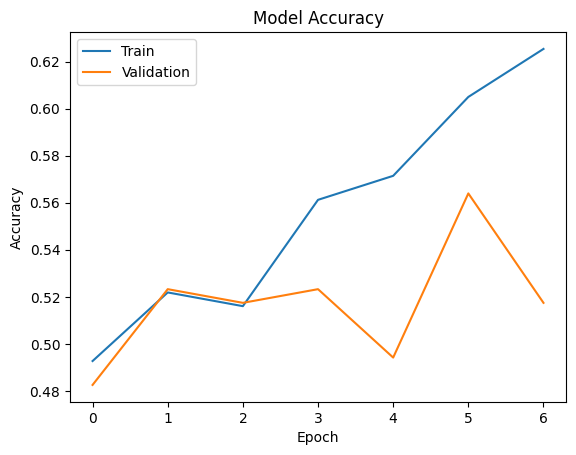

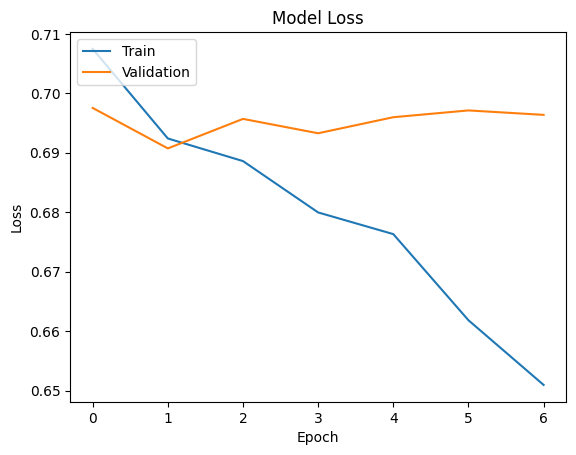

In [59]:
import matplotlib.pyplot as plt

# Assuming 'history' is the training history object from model.fit()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
model.save('final.keras')

# **Deployment**

In [61]:
#making pickle file for deployment
import pickle

# Choosing the one that performed best
model_to_save = xgb_clf # Xgboost

with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model_to_save, file)  # Save the selected model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)